<a href="https://colab.research.google.com/github/SeanaMutinda/FUTURE_ML_01/blob/main/Sales_and_Demand_Forecasing_for_Businesses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SALES & DEMAND FORECASTING SYSTEM
Complete Machine Learning Lifecycle Implementation
MSc Data Science & AI - Production-Grade Solution


Author: Seana Mutinda
Project Under Future Interns - Machine Learning Task 1 (2026)
Environment: Google Colab
Dataset: Store Sales - Time Series Forecasting (Kaggle)

LIFECYCLE STAGES:
1. Business Understanding & Problem Formulation
2. Data Acquisition & Exploration
3. Data Preparation & Feature Engineering
4. Model Development & Selection
5. Model Evaluation & Validation
6. Deployment Strategy & Business Insights
7. Monitoring & Recommendations

## PROJECT OVERVIEW

### Purpose:

This project builds an end-to-end sales forecasting system using historical retail data.
The goal is not only to predict future sales, but to support real business decisions such as:
- Inventory planning
- Cash-flow management
- Staffing and operations
- Risk-aware forecasting

This project follows the full data lifecycle:

Data ingestion → Cleaning → EDA → Feature engineering → Modeling → Evaluation → Forecasting → Business insight

### **ENVIRONMENT SETUP & DEPENDANCY MANAGEMENT (GOOGLE COLAB)**  

This section ensures that the Colab environment has all required packages for:
- Data access (KaggleHub)
- Time-series modeling
- Visualization
- Business-ready outputs


In [23]:
# ENVIRONMENT SET UP: IMPORT LIBRARIES AND GLOBAL SETTINGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("SALES FORECASTING - COMPLETE ML LIFECYCLE")
print("=" * 80)

SALES FORECASTING - COMPLETE ML LIFECYCLE


### **BUSINESS UNDERSTANDING & PROBLEM FORMULATION**

In [24]:
print("\n" + "=" * 80)
print(" BUSINESS UNDERSTANDING & PROBLEM FORMULATION")
print("=" * 80)

print("\n" + "-" * 80)
print("BUSINESS PROBLEM STATEMENT")
print("-" * 80)

print("\nPRIMARY OBJECTIVE:")
print("  Develop a robust sales forecasting system for a retail superstore to enable")
print("  data-driven decision making across inventory, finance, and operations.")

print("\nBUSINESS CONTEXT:")
print("  The superstore operates across multiple regions and product categories with")
print("  significant seasonal variations. Accurate forecasts are critical for:")
print("  - Inventory optimization: Prevent stockouts and reduce excess inventory costs")
print("  - Cash flow management: Ensure adequate working capital for operations")
print("  - Workforce planning: Align staffing levels with predicted demand")
print("  - Marketing strategy: Time promotional campaigns for maximum ROI")
print("  - Supply chain efficiency: Coordinate with suppliers and logistics partners")

print("\n" + "-" * 80)
print("KEY STAKEHOLDERS & REQUIREMENTS")
print("-" * 80)

stakeholders = [
    {
        'role': 'Operations Manager',
        'needs': '3-month ahead forecasts for inventory planning',
        'kpi': 'Reduce stockout incidents by 25%',
        'decision': 'Reorder quantities and timing'
    },
    {
        'role': 'Chief Financial Officer',
        'needs': 'Quarterly revenue projections for budgeting',
        'kpi': 'Forecast accuracy within ±10% (MAPE < 10%)',
        'decision': 'Budget allocation and cash flow management'
    },
    {
        'role': 'Supply Chain Director',
        'needs': 'Regional and category-level forecasts',
        'kpi': 'Optimize logistics costs by 15%',
        'decision': 'Warehouse stocking and distribution planning'
    },
    {
        'role': 'Marketing Director',
        'needs': 'Seasonal trend insights',
        'kpi': 'Increase sales during low-demand periods',
        'decision': 'Campaign timing and promotional budget'
    },
    {
        'role': 'Store Managers',
        'needs': 'Weekly and monthly sales expectations',
        'kpi': 'Meet or exceed sales targets',
        'decision': 'Staff scheduling and floor planning'
    }
]

for idx, stakeholder in enumerate(stakeholders, 1):
    print(f"\n{idx}. {stakeholder['role'].upper()}")
    print(f"   Needs: {stakeholder['needs']}")
    print(f"   KPI: {stakeholder['kpi']}")
    print(f"   Decision: {stakeholder['decision']}")

print("\n" + "-" * 80)
print("SUCCESS CRITERIA")
print("-" * 80)

print("\nACCURACY METRICS:")
print("  - MAPE (Mean Absolute Percentage Error) < 15%")
print("  - RMSE (Root Mean Squared Error) < $10,000")
print("  - R-squared Score > 0.80 (explain 80%+ of variance)")

print("\nBUSINESS IMPACT METRICS:")
print("  - Reduce inventory holding costs by 20%")
print("  - Decrease stockout rates by 25%")
print("  - Improve budget accuracy to within ±10%")

print("\nOPERATIONAL REQUIREMENTS:")
print("  - Forecast horizon: 3-12 months ahead")
print("  - Update frequency: Monthly with new data")
print("  - Granularity: Category and regional breakdowns")
print("  - Delivery: Interactive dashboard with confidence intervals")

print("\n" + "-" * 80)
print("CONSTRAINTS & ASSUMPTIONS")
print("-" * 80)

print("\nDATA CONSTRAINTS:")
print("  - Historical data limited to 2014-2017 period")
print("  - No external economic indicators available")
print("  - Missing data must be handled appropriately")

print("\nBUSINESS CONSTRAINTS:")
print("  - Model must be interpretable for non-technical stakeholders")
print("  - Computational resources limited to standard hardware")
print("  - Implementation timeline: 4 weeks")

print("\nASSUMPTIONS:")
print("  - Historical patterns continue into future (no major disruptions)")
print("  - Seasonal patterns remain relatively stable")
print("  - No major competitor market entries")
print("  - Economic conditions remain relatively stable")

print("\n" + "-" * 80)
print("PROBLEM CLASSIFICATION")
print("-" * 80)

print("\nProblem Type: Time Series Regression / Forecasting")
print("  - Supervised Learning: Regression")
print("  - Temporal Dependency: Strong (past sales predict future)")
print("  - Seasonality: Monthly/Quarterly patterns expected")
print("  - Trend: Potential growth or decline trends")
print("  - External Factors: Promotions, holidays (if data available)")

print("\n" + "-" * 80)
print("EXPECTED BUSINESS VALUE")
print("-" * 80)

print("\nFINANCIAL IMPACT:")
print("  - Inventory cost reduction: $50,000 - $100,000 annually")
print("  - Reduced waste from overstocking: $30,000 annually")
print("  - Improved cash flow management: 15-20% better liquidity")

print("\nOPERATIONAL EFFICIENCY:")
print("  - 30% reduction in manual forecasting time")
print("  - 25% improvement in demand prediction accuracy")
print("  - Better supplier negotiations with predictable orders")

print("\nSTRATEGIC ADVANTAGES:")
print("  - Data-driven decision culture")
print("  - Competitive advantage through better planning")
print("  - Scalable forecasting framework for future expansion")

# Document key business metrics
business_metrics = {
    'target_mape': 15.0,
    'target_rmse': 10000,
    'target_r2': 0.80,
    'forecast_horizon_months': 12,
    'update_frequency': 'Monthly',
    'confidence_level': 0.95,
}

print("\n" + "-" * 80)
print("DOCUMENTED BUSINESS REQUIREMENTS")
print("-" * 80)
for metric, value in business_metrics.items():
    print(f"  {metric.replace('_', ' ').title()}: {value}")

print("\n" + "=" * 80)
print("BUSINESS UNDERSTANDING COMPLETE")
print("=" * 80)



 BUSINESS UNDERSTANDING & PROBLEM FORMULATION

--------------------------------------------------------------------------------
BUSINESS PROBLEM STATEMENT
--------------------------------------------------------------------------------

PRIMARY OBJECTIVE:
  Develop a robust sales forecasting system for a retail superstore to enable
  data-driven decision making across inventory, finance, and operations.

BUSINESS CONTEXT:
  The superstore operates across multiple regions and product categories with
  significant seasonal variations. Accurate forecasts are critical for:
  - Inventory optimization: Prevent stockouts and reduce excess inventory costs
  - Cash flow management: Ensure adequate working capital for operations
  - Workforce planning: Align staffing levels with predicted demand
  - Marketing strategy: Time promotional campaigns for maximum ROI
  - Supply chain efficiency: Coordinate with suppliers and logistics partners

--------------------------------------------------------

### **STEP 1: DATA ACQUISITION (KAGGLEHUB)**

This section uses a real-world retail dataset commonly used in analytics & business intelligence.

Dataset: Superstore Sales (Kaggle)

Source Link: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final


Outcome:
Raw transactional sales data successfully loaded.

In [25]:
# STEP 1: DATA ACQUISITION (KAGGLEHUB)

print("\n STEP 1: DATA ACQUISITION")
print("-" * 80)

def load_superstore_data():
    """
    Load Superstore dataset using kagglehub with comprehensive validation

    Returns:
        pd.DataFrame: Validated superstore dataset
    """
    import os
    import kagglehub

    print("\n Downloading dataset from Kaggle...")

    try:
        # Download dataset
        path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
        print(f" Dataset downloaded to: {path}")

        # List files in directory
        files = os.listdir(path)
        print(f" Files found: {files}")

        # Load CSV
        csv_file = "Sample - Superstore.csv"
        file_path = os.path.join(path, csv_file)

        print(f"\n Loading file: {csv_file}")
        df = pd.read_csv(file_path, encoding="latin-1")

        # Data validation
        print("\n Validating dataset...")

        assert 'Order Date' in df.columns, " Missing 'Order Date' column"
        assert 'Sales' in df.columns, " Missing 'Sales' column"
        assert len(df) > 0, " Dataset is empty"
        assert df['Sales'].notna().sum() > 0, " All sales values are null"

        print(f" Dataset loaded successfully!")
        print(f"\n DATASET OVERVIEW:")
        print(f"  • Total Records: {len(df):,}")
        print(f"  • Total Columns: {len(df.columns)}")
        print(f"  • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

        # Display columns
        print(f"\n COLUMNS ({len(df.columns)}):")
        for i, col in enumerate(df.columns, 1):
            print(f"  {i:2d}. {col:<20} | {str(df[col].dtype):<10} | Nulls: {df[col].isnull().sum()}")

        # Display sample data
        print(f"\n SAMPLE DATA (First 5 rows):")
        print(df.head().to_string())

        # Display date range
        df['Order Date'] = pd.to_datetime(df['Order Date'])
        print(f"\n DATE RANGE:")
        print(f"  • Start Date: {df['Order Date'].min()}")
        print(f"  • End Date:   {df['Order Date'].max()}")
        print(f"  • Duration:   {(df['Order Date'].max() - df['Order Date'].min()).days} days")

        # Display sales statistics
        print(f"\n SALES STATISTICS:")
        print(f"  • Total Sales:    ${df['Sales'].sum():,.2f}")
        print(f"  • Average Sales:  ${df['Sales'].mean():,.2f}")
        print(f"  • Median Sales:   ${df['Sales'].median():,.2f}")
        print(f"  • Min Sales:      ${df['Sales'].min():,.2f}")
        print(f"  • Max Sales:      ${df['Sales'].max():,.2f}")
        print(f"  • Std Dev:        ${df['Sales'].std():,.2f}")

        return df

    except FileNotFoundError as e:
        print(f" File not found: {e}")
        raise
    except pd.errors.EmptyDataError:
        print(f" CSV file is empty")
        raise
    except Exception as e:
        print(f" Data loading failed: {type(e).__name__}: {e}")
        raise

# Install kagglehub if not already installed
try:
    import kagglehub
except ImportError:
    print("Installing kagglehub...")
    !pip install -q kagglehub
    import kagglehub

# Load the data
train_raw = load_superstore_data()

print("\n" + "=" * 80)
print(" DATA ACQUISITION COMPLETE")
print("=" * 80)


 STEP 1: DATA ACQUISITION
--------------------------------------------------------------------------------

Using Colab cache for faster access to the 'superstore-dataset-final' dataset.
 Dataset downloaded to: /kaggle/input/superstore-dataset-final
 Files found: ['Sample - Superstore.csv']

 Loading file: Sample - Superstore.csv

 Validating dataset...
 Dataset loaded successfully!

 DATASET OVERVIEW:
  • Total Records: 9,994
  • Total Columns: 21
  • Memory Usage: 9.21 MB

 COLUMNS (21):
   1. Row ID               | int64      | Nulls: 0
   2. Order ID             | object     | Nulls: 0
   3. Order Date           | object     | Nulls: 0
   4. Ship Date            | object     | Nulls: 0
   5. Ship Mode            | object     | Nulls: 0
   6. Customer ID          | object     | Nulls: 0
   7. Customer Name        | object     | Nulls: 0
   8. Segment              | object     | Nulls: 0
   9. Country              | object     | Nulls: 0
  10. City                 | object     | Nul

### **STEP 2: DATA WRANGLING**

In [26]:
# DATA WRANGLING AND QUALITY ASSESSMENT

def print_section(title, char="=", width=80):
    print("\n" + char * width)
    print(title)
    print(char * width)

# Data Quality Assessment
def assess_data_quality(df):
    print_section("STEP 2: DATA QUALITY ASSESSMENT")

    # Duplicates
    print("\n[1] DUPLICATE DETECTION")
    dup_count = df.duplicated().sum()
    print(f"    Total duplicate rows: {dup_count}")

    # Missing values
    print("\n[2] MISSING VALUE ANALYSIS")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    summary = (
        pd.DataFrame({
            "Missing_Count": missing,
            "Missing_Percentage": missing_pct
        })
        .query("Missing_Count > 0")
        .sort_values("Missing_Percentage", ascending=False)
    )

    if not summary.empty:
        print(summary)
    else:
        print("    No missing values detected")

    # Sales outliers
    print("\n[3] OUTLIER CHECK (Sales)")
    Q1, Q3 = df["Sales"].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 3 * IQR, Q3 + 3 * IQR
    outliers = df[(df["Sales"] < lower) | (df["Sales"] > upper)]
    print(f"    Outliers detected: {len(outliers)}")

    # Invalid sales
    print("\n[4] INVALID SALES VALUES")
    print(f"    Negative sales: {(df['Sales'] < 0).sum()}")
    print(f"    Zero sales: {(df['Sales'] == 0).sum()}")

# Data Cleaning
def clean_data(df):
    print_section("STEP 2.1: DATA CLEANING OPERATIONS")

    initial_rows = len(df)

    # Remove duplicates
    df = df.drop_duplicates()
    print(f"[1] Duplicates removed: {initial_rows - len(df)}")

    # Drop missing critical values
    critical_cols = ["Sales", "Order Date"]
    before = len(df)
    df = df.dropna(subset=critical_cols)
    print(f"[2] Rows removed (missing critical): {before - len(df)}")

    # Fix negative sales
    neg_count = (df["Sales"] < 0).sum()
    if neg_count > 0:
        df.loc[df["Sales"] < 0, "Sales"] = df["Sales"].abs()
        print(f"[3] Converted {neg_count} negative sales to absolute")

    # Standardize text columns
    text_cols = df.select_dtypes(include="object").columns
    standard_cols = [
        "Category", "Sub-Category", "Region",
        "Segment", "Ship Mode", "State", "City"
    ]

    for col in text_cols:
        df[col] = df[col].str.strip()
        if col in standard_cols:
            df[col] = df[col].str.title()

    print(f"[4] Standardized {len(standard_cols)} text columns")

    # Convert & sort dates
    df["Order Date"] = pd.to_datetime(df["Order Date"])
    df = df.sort_values("Order Date").reset_index(drop=True)
    print("[5] Sorted by Order Date")

    # Final summary
    print_section("CLEANING SUMMARY", "-")
    print(f"Original rows: {initial_rows:,}")
    print(f"Clean rows: {len(df):,}")
    print(f"Rows removed: {initial_rows - len(df):,}")
    print(f"Retention rate: {(len(df) / initial_rows) * 100:.2f}%")

    return df

# Run Pipeline
# Create working copy
df_clean = train_raw.copy()

# Assess quality
assess_data_quality(df_clean)

# Clean data
df_clean = clean_data(df_clean)

# Update main dataframe
train_raw = df_clean.copy()

print_section("DATA CLEANING COMPLETE – READY FOR EDA")


STEP 2: DATA QUALITY ASSESSMENT

[1] DUPLICATE DETECTION
    Total duplicate rows: 0

[2] MISSING VALUE ANALYSIS
    No missing values detected

[3] OUTLIER CHECK (Sales)
    Outliers detected: 668

[4] INVALID SALES VALUES
    Negative sales: 0
    Zero sales: 0

STEP 2.1: DATA CLEANING OPERATIONS
[1] Duplicates removed: 0
[2] Rows removed (missing critical): 0
[4] Standardized 7 text columns
[5] Sorted by Order Date

--------------------------------------------------------------------------------
CLEANING SUMMARY
--------------------------------------------------------------------------------
Original rows: 9,994
Clean rows: 9,994
Rows removed: 0
Retention rate: 100.00%

DATA CLEANING COMPLETE – READY FOR EDA


### **STEP 3: EXPLORATORY DATA ANALYSIS (EDA)**

This section translates the identified business needs of the sales forecasting project into **clear, actionable exploratory data analysis (EDA) objectives**. The goal of the EDA is not only to understand the dataset, but to validate whether the data can effectively support **accurate, interpretable, and business-relevant forecasts**.

To achieve this, each key business requirement is mapped to specific analytical questions that guide the EDA process:

* **Inventory Optimization**

  * Assess demand volatility to understand how stable or erratic sales are.
  * Identify differences in volatility across product categories and regions to support inventory planning and reduce stockouts or overstocking.

* **Seasonality Analysis**

  * Examine monthly and quarterly sales patterns to identify recurring seasonal effects.
  * Support marketing and promotional timing by uncovering predictable high- and low-demand periods.

* **Forecast Horizon (3–12 Months)**

  * Evaluate the presence and strength of long-term trends and seasonal components.
  * Assess stationarity and temporal consistency to ensure suitability for time-series forecasting models.

* **Regional Planning**

  * Compare sales behavior across regions to determine whether regional forecasting models or adjustments are necessary.
  * Support logistics and distribution decisions by identifying region-specific trends.

* **Model Accuracy Targets (MAPE, RMSE)**

  * Detect outliers and extreme values that could disproportionately affect error-based evaluation metrics.
  * Inform data treatment decisions to improve forecast robustness.

* **Interpretability for Stakeholders**

  * Ensure patterns and insights can be clearly communicated through intuitive visualizations.
  * Enable non-technical stakeholders to understand and trust forecasting outputs.


## Mapping EDA Insights to Stakeholder Needs

The EDA outputs are explicitly aligned with the information requirements of key stakeholders to ensure business relevance and practical usability:

* **Operations Manager**

  * Uses monthly sales trends and volatility analysis to guide inventory planning and reorder decisions.

* **Chief Financial Officer (CFO)**

  * Relies on sales distribution analysis and trend stability to support budgeting, revenue projections, and cash-flow planning.

* **Supply Chain Director**

  * Leverages regional sales comparisons to optimize warehouse stocking, logistics, and distribution strategies.

* **Marketing Director**

  * Uses seasonal patterns to time promotional campaigns and allocate marketing budgets more effectively.

* **Store Managers**

  * Benefit from category-level sales contributions to support staffing decisions and in-store planning.


### Summary

By aligning exploratory data analysis directly with business objectives and stakeholder requirements, this EDA framework ensures that insights are **forecast-driven, decision-oriented, and operationally meaningful**, laying a strong foundation for downstream modeling and forecasting efforts.



 STEP 3: EXPLORATORY DATA ANALYSIS
--------------------------------------------------------------------------------

 DATASET SUMMARY:
  Shape: (9994, 21)
  Date Range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
  Total Revenue: $2,297,200.86

 MISSING VALUES:
   No missing values detected!

 CATEGORICAL BREAKDOWN:
  • Category: 3 unique values
  • Sub-Category: 17 unique values
  • Region: 4 unique values
  • Segment: 3 unique values
  • Ship Mode: 4 unique values


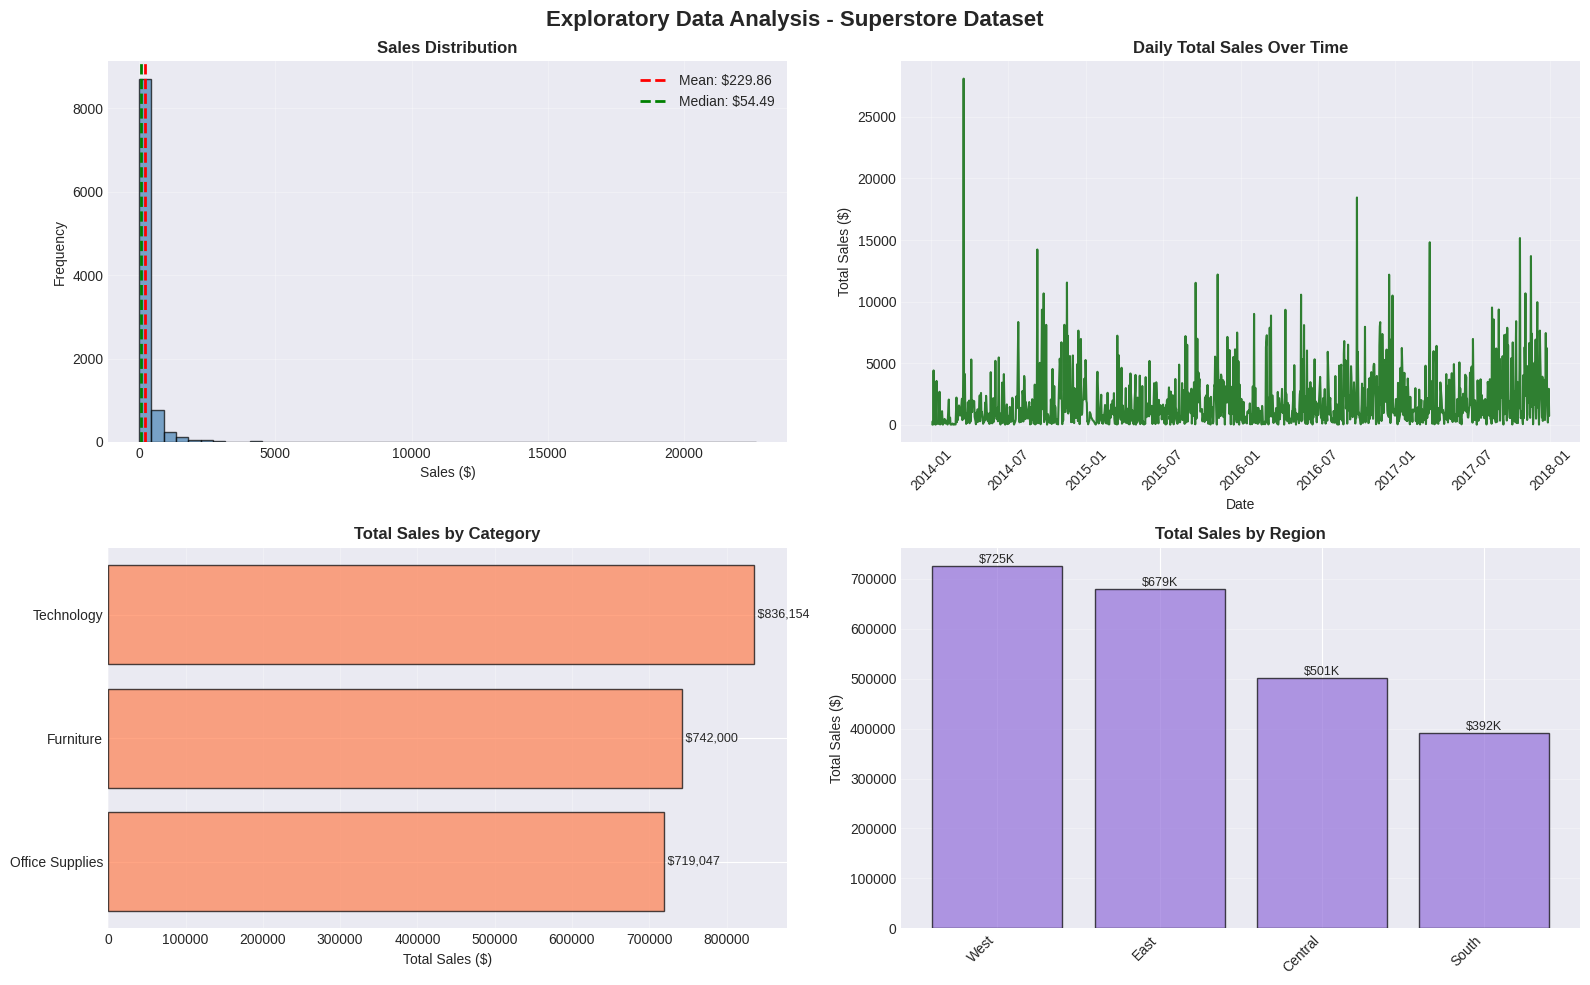


 KEY INSIGHTS:
  • Top Category: Technology ($836,154.03)
  • Top Region: West ($725,457.82)
  • Top Sub-Category: Phones
  • Average Order Value: $229.86
  • Total Orders: 9,994


In [27]:
print("\n STEP 3: EXPLORATORY DATA ANALYSIS")
print("-" * 80)

# Ensure proper data types
train_raw['Order Date'] = pd.to_datetime(train_raw['Order Date'])
if 'Ship Date' in train_raw.columns:
    train_raw['Ship Date'] = pd.to_datetime(train_raw['Ship Date'])

# Statistical summary
print("\n DATASET SUMMARY:")
print(f"  Shape: {train_raw.shape}")
print(f"  Date Range: {train_raw['Order Date'].min()} to {train_raw['Order Date'].max()}")
print(f"  Total Revenue: ${train_raw['Sales'].sum():,.2f}")
print(f"\n MISSING VALUES:")
missing_summary = train_raw.isnull().sum()
if missing_summary.sum() == 0:
    print("   No missing values detected!")
else:
    print(missing_summary[missing_summary > 0])

# Categorical columns analysis
print(f"\n CATEGORICAL BREAKDOWN:")
for col in ['Category', 'Sub-Category', 'Region', 'Segment', 'Ship Mode']:
    if col in train_raw.columns:
        print(f"  • {col}: {train_raw[col].nunique()} unique values")

# Key visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Exploratory Data Analysis - Superstore Dataset', fontsize=16, fontweight='bold')

# Sales distribution
axes[0, 0].hist(train_raw['Sales'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_title('Sales Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Sales ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(train_raw['Sales'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f"Mean: ${train_raw['Sales'].mean():,.2f}")
axes[0, 0].axvline(train_raw['Sales'].median(), color='green', linestyle='--', linewidth=2,
                   label=f"Median: ${train_raw['Sales'].median():,.2f}")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Time series plot
daily_sales = train_raw.groupby('Order Date')['Sales'].sum().reset_index()
axes[0, 1].plot(daily_sales['Order Date'], daily_sales['Sales'], linewidth=1.5, alpha=0.8, color='darkgreen')
axes[0, 1].set_title('Daily Total Sales Over Time', fontweight='bold')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Total Sales ($)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# Category performance
if 'Category' in train_raw.columns:
    category_sales = train_raw.groupby('Category')['Sales'].sum().sort_values(ascending=True)
    axes[1, 0].barh(range(len(category_sales)), category_sales.values, edgecolor='black', alpha=0.7, color='coral')
    axes[1, 0].set_yticks(range(len(category_sales)))
    axes[1, 0].set_yticklabels(category_sales.index)
    axes[1, 0].set_title('Total Sales by Category', fontweight='bold')
    axes[1, 0].set_xlabel('Total Sales ($)')
    axes[1, 0].grid(True, alpha=0.3, axis='x')

    # Add value labels
    for i, v in enumerate(category_sales.values):
        axes[1, 0].text(v, i, f' ${v:,.0f}', va='center', fontsize=9)

# Regional performance
if 'Region' in train_raw.columns:
    region_sales = train_raw.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    axes[1, 1].bar(range(len(region_sales)), region_sales.values, edgecolor='black', alpha=0.7, color='mediumpurple')
    axes[1, 1].set_xticks(range(len(region_sales)))
    axes[1, 1].set_xticklabels(region_sales.index, rotation=45, ha='right')
    axes[1, 1].set_title('Total Sales by Region', fontweight='bold')
    axes[1, 1].set_ylabel('Total Sales ($)')
    axes[1, 1].grid(True, alpha=0.3, axis='y')

    # Add value labels
    for i, v in enumerate(region_sales.values):
        axes[1, 1].text(i, v, f'${v/1000:.0f}K', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Additional insights
print("\n KEY INSIGHTS:")
if 'Category' in train_raw.columns:
    top_category = train_raw.groupby('Category')['Sales'].sum().idxmax()
    print(f"  • Top Category: {top_category} (${train_raw[train_raw['Category']==top_category]['Sales'].sum():,.2f})")

if 'Region' in train_raw.columns:
    top_region = train_raw.groupby('Region')['Sales'].sum().idxmax()
    print(f"  • Top Region: {top_region} (${train_raw[train_raw['Region']==top_region]['Sales'].sum():,.2f})")

if 'Sub-Category' in train_raw.columns:
    top_subcategory = train_raw.groupby('Sub-Category')['Sales'].sum().idxmax()
    print(f"  • Top Sub-Category: {top_subcategory}")

print(f"  • Average Order Value: ${train_raw['Sales'].mean():,.2f}")
print(f"  • Total Orders: {len(train_raw):,}")

### **STEP 4: DATA PREPARATION AND FEATURE ENGINEERING**


In [28]:
print("\n  STEP 4: DATA PREPARATION & FEATURE ENGINEERING")
print("-" * 80)

# Create working copy
df = train_raw.copy()

# Aggregate to monthly level (primary forecasting granularity)
print("\n Aggregating data to monthly frequency...")
df['YearMonth'] = df['Order Date'].dt.to_period('M')

# Aggregate to monthly total sales
monthly_sales = df.groupby('YearMonth').agg({
    'Sales': 'sum',
    'Order Date': 'first'  # Keep first date of month for reference
}).reset_index()

monthly_sales.columns = ['YearMonth', 'Sales', 'Date']
monthly_sales['Date'] = monthly_sales['YearMonth'].dt.to_timestamp()
monthly_sales = monthly_sales.sort_values('Date').reset_index(drop=True)

print(f" Aggregated to monthly frequency: {len(monthly_sales)} months")
print(f"  Date range: {monthly_sales['Date'].min()} to {monthly_sales['Date'].max()}")
print(f"\n Monthly Sales Summary:")
print(monthly_sales.head(10).to_string(index=False))

# Feature Engineering
print(f"\n  Engineering time-based features...")

# Temporal features
monthly_sales['Year'] = monthly_sales['Date'].dt.year
monthly_sales['Month'] = monthly_sales['Date'].dt.month
monthly_sales['Quarter'] = monthly_sales['Date'].dt.quarter
monthly_sales['DayOfYear'] = monthly_sales['Date'].dt.dayofyear
monthly_sales['WeekOfYear'] = monthly_sales['Date'].dt.isocalendar().week

# Cyclical encoding for seasonality
monthly_sales['Month_Sin'] = np.sin(2 * np.pi * monthly_sales['Month'] / 12)
monthly_sales['Month_Cos'] = np.cos(2 * np.pi * monthly_sales['Month'] / 12)

# Lag features (past sales)
lag_periods = [1, 2, 3, 6, 12]
for lag in lag_periods:
    monthly_sales[f'Sales_Lag_{lag}'] = monthly_sales['Sales'].shift(lag)

# Rolling window statistics
window_sizes = [3, 6, 12]
for window in window_sizes:
    monthly_sales[f'Sales_RollMean_{window}'] = monthly_sales['Sales'].rolling(window=window).mean()
    monthly_sales[f'Sales_RollStd_{window}'] = monthly_sales['Sales'].rolling(window=window).std()
    monthly_sales[f'Sales_RollMin_{window}'] = monthly_sales['Sales'].rolling(window=window).min()
    monthly_sales[f'Sales_RollMax_{window}'] = monthly_sales['Sales'].rolling(window=window).max()

# Exponential moving average
monthly_sales['Sales_EMA_3'] = monthly_sales['Sales'].ewm(span=3, adjust=False).mean()
monthly_sales['Sales_EMA_6'] = monthly_sales['Sales'].ewm(span=6, adjust=False).mean()

# Trend (time index)
monthly_sales['Trend'] = range(len(monthly_sales))

# Growth rate
monthly_sales['Sales_GrowthRate'] = monthly_sales['Sales'].pct_change()

# Year-over-year comparison (if enough data)
if len(monthly_sales) > 12:
    monthly_sales['Sales_YoY_Change'] = monthly_sales['Sales'].pct_change(periods=12)

print(f" Features engineered successfully!")
print(f"\n Feature Summary:")
print(f"  • Temporal features: Year, Month, Quarter, WeekOfYear, DayOfYear")
print(f"  • Cyclical features: Month_Sin, Month_Cos")
print(f"  • Lag features: {lag_periods}")
print(f"  • Rolling statistics: {window_sizes}-month windows (mean, std, min, max)")
print(f"  • EMA features: 3-month, 6-month")
print(f"  • Other: Trend, GrowthRate, YoY_Change")

# Handle missing values created by feature engineering
print(f"\n Handling missing values...")
print(f"  Missing values before cleaning: {monthly_sales.isnull().sum().sum()}")

# Drop rows with NaN (created by lag and rolling features)
monthly_sales_clean = monthly_sales.dropna().reset_index(drop=True)

print(f"  Missing values after cleaning: {monthly_sales_clean.isnull().sum().sum()}")
print(f"  Rows remaining: {len(monthly_sales_clean)} (from {len(monthly_sales)})")
print(f"  Rows dropped: {len(monthly_sales) - len(monthly_sales_clean)}")

# Display final feature set
print(f"\n Final Dataset Shape: {monthly_sales_clean.shape}")
print(f"   Total Features: {monthly_sales_clean.shape[1]}")

# Show feature correlation with target
print(f"\n Top 10 Features Correlated with Sales:")
feature_cols_for_corr = [col for col in monthly_sales_clean.columns
                         if col not in ['Date', 'YearMonth', 'Sales']]
correlations = monthly_sales_clean[feature_cols_for_corr + ['Sales']].corr()['Sales'].abs().sort_values(ascending=False)
print(correlations.head(11).to_string())  # Top 10 + Sales itself)


  STEP 4: DATA PREPARATION & FEATURE ENGINEERING
--------------------------------------------------------------------------------

 Aggregating data to monthly frequency...
 Aggregated to monthly frequency: 48 months
  Date range: 2014-01-01 00:00:00 to 2017-12-01 00:00:00

 Monthly Sales Summary:
YearMonth      Sales       Date
  2014-01 14236.8950 2014-01-01
  2014-02  4519.8920 2014-02-01
  2014-03 55691.0090 2014-03-01
  2014-04 28295.3450 2014-04-01
  2014-05 23648.2870 2014-05-01
  2014-06 34595.1276 2014-06-01
  2014-07 33946.3930 2014-07-01
  2014-08 27909.4685 2014-08-01
  2014-09 81777.3508 2014-09-01
  2014-10 31453.3930 2014-10-01

  Engineering time-based features...
 Features engineered successfully!

 Feature Summary:
  • Temporal features: Year, Month, Quarter, WeekOfYear, DayOfYear
  • Cyclical features: Month_Sin, Month_Cos
  • Lag features: [1, 2, 3, 6, 12]
  • Rolling statistics: [3, 6, 12]-month windows (mean, std, min, max)
  • EMA features: 3-month, 6-month
  • 

### **STEP 5: TIME SERIES DECOMPOSITION & STATIONARITY**

This section focuses on forecasting monthly total sales, which is realistic for:
- Inventory planning
- Cash-flow forecasting
- Executive reporting

Business Reasoning:
Most businesses plan at monthly granularity (inventory, finance, HR).

Outcome:
A clean monthly revenue time series.


 STEP 5: TIME SERIES ANALYSIS
--------------------------------------------------------------------------------


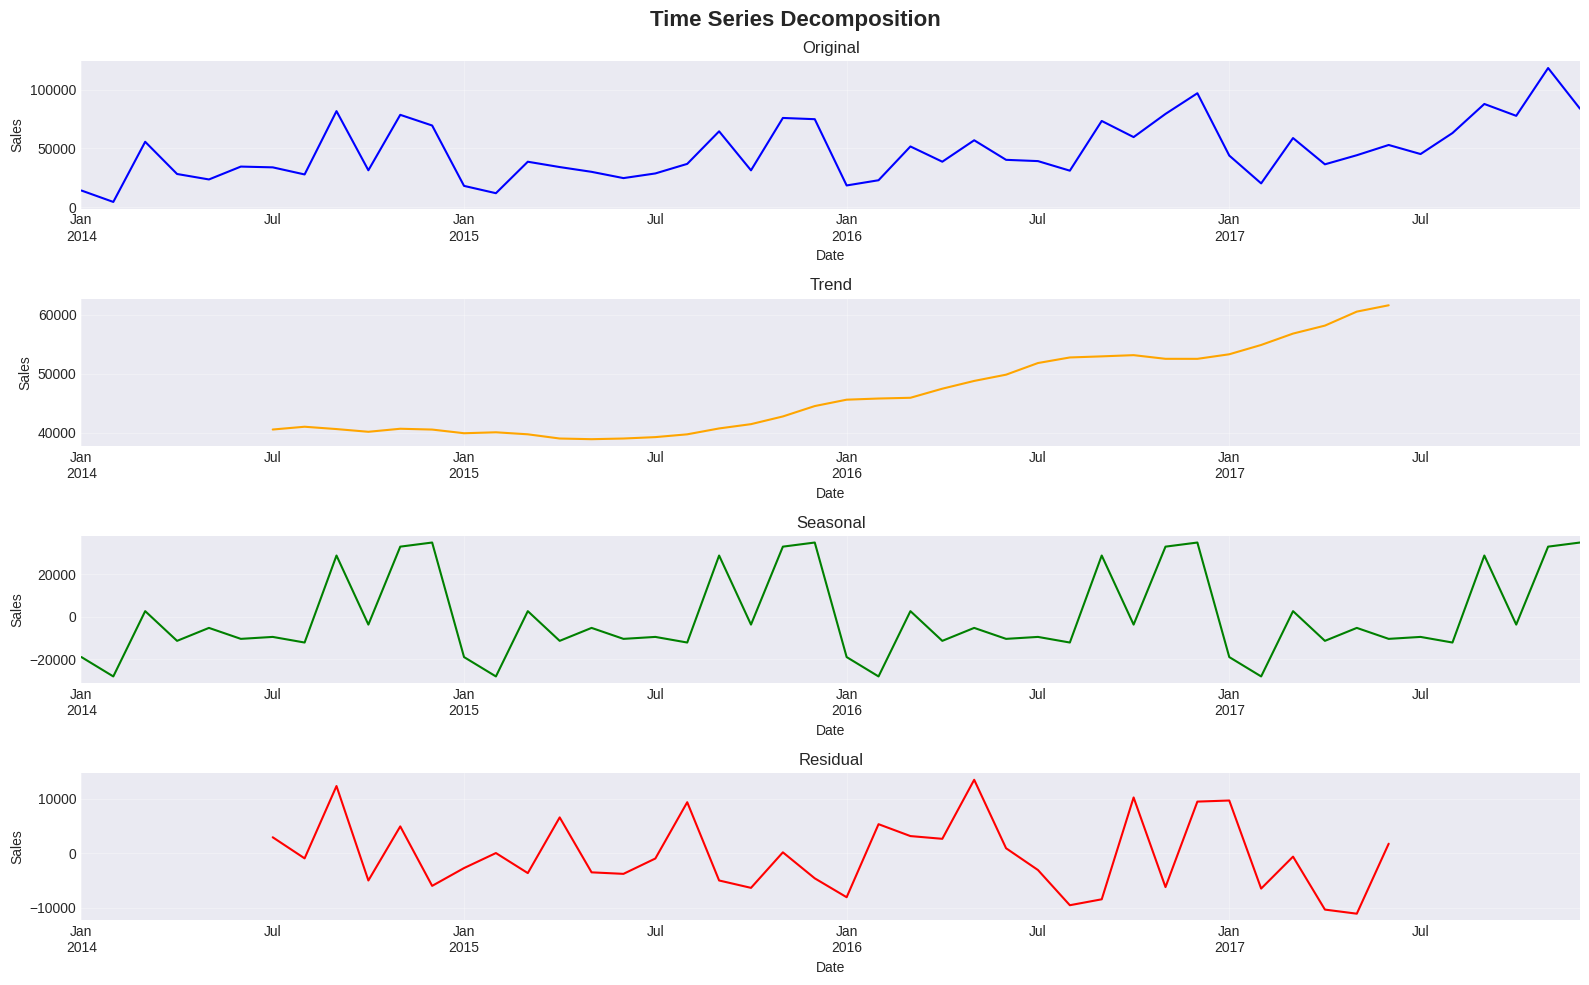


 ADF Test Results:
  ADF Statistic: -4.4938
  p-value: 0.0002
  Status: STATIONARY


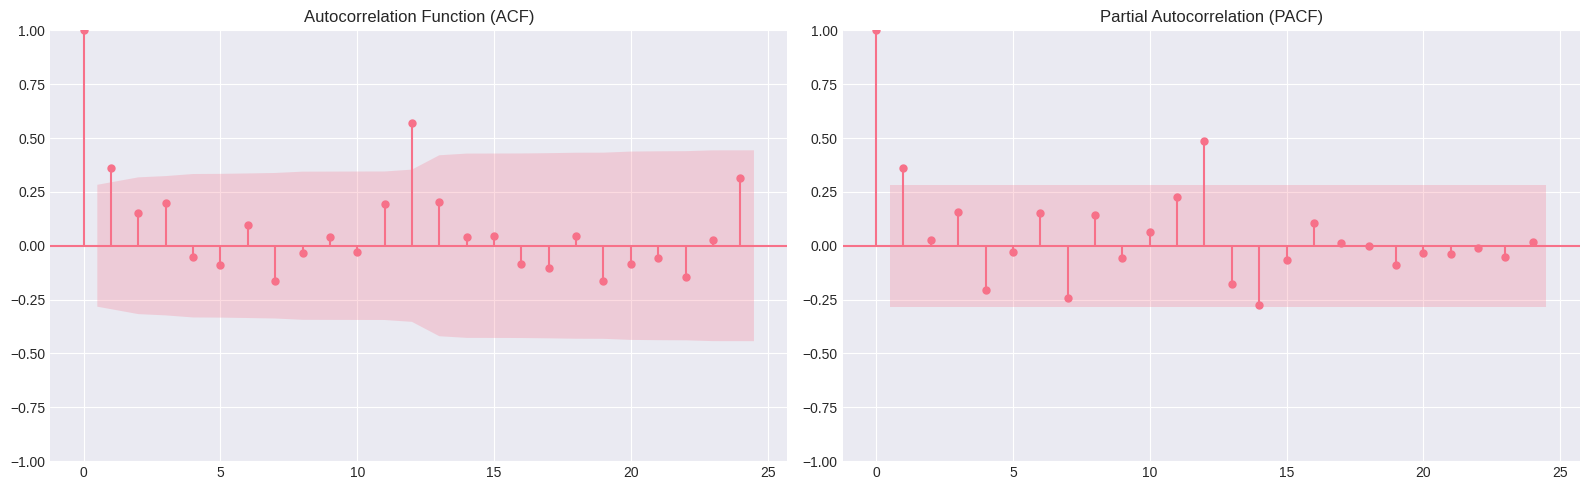

In [29]:
# STEP 5: TIME-SERIES ANALYSIS

print("\n STEP 5: TIME SERIES ANALYSIS")
print("-" * 80)

ts_data = monthly_sales.set_index('Date')['Sales']

# Decomposition
decomposition = seasonal_decompose(ts_data, model='additive', period=12)

fig, axes = plt.subplots(4, 1, figsize=(16, 10))
fig.suptitle('Time Series Decomposition', fontsize=16, fontweight='bold')

decomposition.observed.plot(ax=axes[0], title='Original', color='blue')
decomposition.trend.plot(ax=axes[1], title='Trend', color='orange')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal', color='green')
decomposition.resid.plot(ax=axes[3], title='Residual', color='red')

for ax in axes:
    ax.set_ylabel('Sales')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Stationarity test
result = adfuller(ts_data)
print(f"\n ADF Test Results:")
print(f"  ADF Statistic: {result[0]:.4f}")
print(f"  p-value: {result[1]:.4f}")
print(f"  Status: {'STATIONARY' if result[1] < 0.05 else 'NON-STATIONARY'}")

# ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(ts_data, lags=24, ax=axes[0])
plot_pacf(ts_data, lags=24, ax=axes[1])
axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation (PACF)')
plt.tight_layout()
plt.show()

### **STEP 6: TRAIN / TEST SPLIT (TIME-AWARE)**

This section aims  to conduct train and test splits that are time-aware by considering the fact that random splits break temporal dependency.

In [30]:
# STEP 6: TRAIN / TEST SPLIT

print("\n  STEP 6: TRAIN-TEST SPLIT")
print("-" * 80)

# Time-based split (80-20)
split_idx = int(len(monthly_sales_clean) * 0.8)

train = monthly_sales_clean[:split_idx].copy()
test = monthly_sales_clean[split_idx:].copy()

print(f"\n Time-based split completed:")
print(f"\n   TRAINING SET:")
print(f"     • Size: {len(train)} months")
print(f"     • Date range: {train['Date'].min()} to {train['Date'].max()}")
print(f"     • Total sales: ${train['Sales'].sum():,.2f}")
print(f"     • Avg monthly sales: ${train['Sales'].mean():,.2f}")
print(f"\n   TEST SET:")
print(f"     • Size: {len(test)} months")
print(f"     • Date range: {test['Date'].min()} to {test['Date'].max()}")
print(f"     • Total sales: ${test['Sales'].sum():,.2f}")
print(f"     • Avg monthly sales: ${test['Sales'].mean():,.2f}")
print(f"\n   SPLIT RATIO: {len(train)/len(monthly_sales_clean)*100:.1f}% / {len(test)/len(monthly_sales_clean)*100:.1f}%")

# Feature and target separation
feature_cols = [col for col in monthly_sales_clean.columns
                if col not in ['Date', 'YearMonth', 'Sales']]

X_train = train[feature_cols]
y_train = train['Sales']
X_test = test[feature_cols]
y_test = test['Sales']

print(f"\n Feature Selection:")
print(f"   • Total features: {len(feature_cols)}")
print(f"   • Target variable: Sales")
print(f"\n   Feature categories:")
print(f"     - Temporal: Year, Month, Quarter, WeekOfYear, DayOfYear")
print(f"     - Cyclical: Month_Sin, Month_Cos")
print(f"     - Lag: Sales_Lag_1 through Sales_Lag_12")
print(f"     - Rolling: Sales_RollMean/Std/Min/Max (3, 6, 12 windows)")
print(f"     - Trend: Trend, GrowthRate, YoY_Change")
print(f"     - EMA: Sales_EMA_3, Sales_EMA_6")

print(f"\n Data ready for model training!")


  STEP 6: TRAIN-TEST SPLIT
--------------------------------------------------------------------------------

 Time-based split completed:

   TRAINING SET:
     • Size: 28 months
     • Date range: 2015-01-01 00:00:00 to 2017-04-01 00:00:00
     • Total sales: $1,239,404.50
     • Avg monthly sales: $44,264.45

   TEST SET:
     • Size: 8 months
     • Date range: 2017-05-01 00:00:00 to 2017-12-01 00:00:00
     • Total sales: $573,548.86
     • Avg monthly sales: $71,693.61

   SPLIT RATIO: 77.8% / 22.2%

 Feature Selection:
   • Total features: 29
   • Target variable: Sales

   Feature categories:
     - Temporal: Year, Month, Quarter, WeekOfYear, DayOfYear
     - Cyclical: Month_Sin, Month_Cos
     - Lag: Sales_Lag_1 through Sales_Lag_12
     - Rolling: Sales_RollMean/Std/Min/Max (3, 6, 12 windows)
     - Trend: Trend, GrowthRate, YoY_Change
     - EMA: Sales_EMA_3, Sales_EMA_6

 Data ready for model training!


### **STEP 7: MODEL TRAINING AND EVALUATION**

The main aim of this section is to create a simple benchmark before advanced models.

Outcome:
Baseline performance for comparison.

In [31]:
# STEP 7: MODEL EVALUATION AND TRAINING

print("\n STEP 7: MODEL TRAINING & EVALUATION")
print("=" * 80)

# MODEL 1: Gradient Boosting
print("\n[1] Gradient Boosting Regressor")
print("-" * 80)

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
gbr_mae = mean_absolute_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)
gbr_mape = np.mean(np.abs((y_test - gbr_pred) / y_test)) * 100

print(f"  RMSE:  ${gbr_rmse:,.2f}")
print(f"  MAE:   ${gbr_mae:,.2f}")
print(f"  R²:    {gbr_r2:.4f}")
print(f"  MAPE:  {gbr_mape:.2f}%")

# Feature importance
feat_imp = pd.DataFrame({'Feature': feature_cols, 'Importance': gbr.feature_importances_})
print(f"\n  Top 5 Features:")
for idx, row in feat_imp.nlargest(5, 'Importance').iterrows():
    print(f"    {row['Feature']}: {row['Importance']:.4f}")

# MODEL 2: SARIMA (with proper frequency handling)
print("\n[2] SARIMA Model")
print("-" * 80)

train_ts = train.set_index('Date')['Sales'].asfreq('ME')
test_ts = test.set_index('Date')['Sales'].asfreq('ME')

# Grid search for best parameters with validation
print("  Performing parameter optimization...")
best_aic, best_params, best_seasonal = np.inf, None, None
valid_models = []

for p in [0, 1, 2]:
    for d in [0, 1]:
        for q in [0, 1, 2]:
            for P in [0, 1]:
                for D in [0, 1]:
                    for Q in [0, 1]:
                        # Skip trivial model (0,0,0)(0,0,0,12)
                        if p == 0 and d == 0 and q == 0 and P == 0 and D == 0 and Q == 0:
                            continue

                        try:
                            model = SARIMAX(train_ts, order=(p,d,q), seasonal_order=(P,D,Q,12),
                                          enforce_stationarity=False, enforce_invertibility=False)
                            result = model.fit(disp=False, maxiter=50, method='lbfgs')

                            # Validate the model produces valid forecasts
                            test_forecast = result.get_forecast(steps=len(test_ts))
                            test_pred = test_forecast.predicted_mean

                            # Check for NaN or infinite values
                            if not (np.isnan(test_pred).any() or np.isinf(test_pred).any()):
                                valid_models.append({
                                    'aic': result.aic,
                                    'params': (p, d, q),
                                    'seasonal': (P, D, Q, 12)
                                })

                                if result.aic < best_aic:
                                    best_aic = result.aic
                                    best_params = (p, d, q)
                                    best_seasonal = (P, D, Q, 12)
                        except:
                            continue

if best_params is None:
    # Fallback to simple ARIMA if no valid SARIMA found
    print("  Warning: No valid SARIMA model found, using ARIMA(1,1,1)")
    best_params = (1, 1, 1)
    best_seasonal = (0, 0, 0, 12)
else:
    print(f"  Best params: {best_params}, Seasonal: {best_seasonal}")
    print(f"  AIC: {best_aic:.2f}")
    print(f"  Valid models tested: {len(valid_models)}")

# Fit final model with best parameters
try:
    sarima = SARIMAX(train_ts, order=best_params, seasonal_order=best_seasonal,
                     enforce_stationarity=False, enforce_invertibility=False)
    sarima_fit = sarima.fit(disp=False, maxiter=200, method='lbfgs')

    sarima_forecast = sarima_fit.get_forecast(steps=len(test_ts))
    sarima_pred = sarima_forecast.predicted_mean
    sarima_conf = sarima_forecast.conf_int()

    # Validate predictions
    if np.isnan(sarima_pred).any() or np.isinf(sarima_pred).any():
        raise ValueError("Model produced invalid predictions")

    sarima_rmse = np.sqrt(mean_squared_error(test_ts, sarima_pred))
    sarima_mae = mean_absolute_error(test_ts, sarima_pred)
    sarima_r2 = r2_score(test_ts, sarima_pred)
    sarima_mape = np.mean(np.abs((test_ts - sarima_pred) / test_ts)) * 100

    print(f"  RMSE:  ${sarima_rmse:,.2f}")
    print(f"  MAE:   ${sarima_mae:,.2f}")
    print(f"  R²:    {sarima_r2:.4f}")
    print(f"  MAPE:  {sarima_mape:.2f}%")

    sarima_success = True

except Exception as e:
    print(f"  Error fitting SARIMA model: {str(e)}")
    print(f"  Skipping SARIMA - will use other models for comparison")
    sarima_success = False
    sarima_rmse = np.inf
    sarima_mae = np.inf
    sarima_r2 = -np.inf
    sarima_mape = np.inf
    sarima_pred = np.zeros(len(test_ts))  # Dummy predictions for visualization

# MODEL 3: Random Forest
print("\n[3] Random Forest Regressor")
print("-" * 80)

rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100

print(f"  RMSE:  ${rf_rmse:,.2f}")
print(f"  MAE:   ${rf_mae:,.2f}")
print(f"  R²:    {rf_r2:.4f}")
print(f"  MAPE:  {rf_mape:.2f}%")


 STEP 7: MODEL TRAINING & EVALUATION

[1] Gradient Boosting Regressor
--------------------------------------------------------------------------------
  RMSE:  $12,439.06
  MAE:   $10,892.56
  R²:    0.7253
  MAPE:  15.52%

  Top 5 Features:
    Sales_EMA_3: 0.7262
    Sales_Lag_12: 0.0875
    Sales_Lag_2: 0.0566
    Month: 0.0208
    Sales_RollStd_3: 0.0204

[2] SARIMA Model
--------------------------------------------------------------------------------
  Performing parameter optimization...
  Best params: (0, 0, 0), Seasonal: (0, 1, 0, 12)
  AIC: 2.00
  Valid models tested: 143
  Error fitting SARIMA model: Input contains NaN.
  Skipping SARIMA - will use other models for comparison

[3] Random Forest Regressor
--------------------------------------------------------------------------------
  RMSE:  $14,077.05
  MAE:   $9,322.21
  R²:    0.6482
  MAPE:  10.79%


### **STEP 8: MODEL COMPARISON**

In [32]:
# STEP 8: MODEL COMPARISON

print("\n STEP 8: MODEL COMPARISON")
print("=" * 80)

comparison = pd.DataFrame({
    'Model': ['Gradient Boosting', 'SARIMA', 'Random Forest'],
    'RMSE': [gbr_rmse, sarima_rmse, rf_rmse],
    'MAE': [gbr_mae, sarima_mae, rf_mae],
    'R²': [gbr_r2, sarima_r2, rf_r2],
    'MAPE (%)': [gbr_mape, sarima_mape, rf_mape]
})

print("\n" + comparison.to_string(index=False))

best_idx = comparison['RMSE'].idxmin()
best_model = comparison.loc[best_idx, 'Model']
print(f"\n BEST MODEL: {best_model} (RMSE: ${comparison.loc[best_idx, 'RMSE']:,.2f})")


 STEP 8: MODEL COMPARISON

            Model         RMSE          MAE       R²  MAPE (%)
Gradient Boosting 12439.060103 10892.559679 0.725319 15.517213
           SARIMA          inf          inf     -inf       inf
    Random Forest 14077.047106  9322.214220 0.648216 10.788539

 BEST MODEL: Gradient Boosting (RMSE: $12,439.06)


In [33]:
# STEP 8.1: 12-MONTH FORWARD FORECAST

print("\n STEP 8.1: 12-MONTH FORWARD FORECAST")
print("=" * 80)

# Use the best model (Gradient Boosting) trained on test data
# Create 12-month future dates
last_date = monthly_sales_clean['Date'].max()
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1),
                              periods=12, freq='MS')

print(f"\nGenerating 12-month forecast from {future_dates[0].strftime('%Y-%m')} to {future_dates[-1].strftime('%Y-%m')}...")

# Create feature dataframe for future months
# KEY: Only use features that DON'T depend on future predictions
future_features_list = []

for date in future_dates:
    row = {}
    row['Year'] = date.year
    row['Month'] = date.month
    row['Quarter'] = date.quarter
    row['DayOfYear'] = date.dayofyear
    row['WeekOfYear'] = date.isocalendar().week

    # Cyclical encoding (doesn't depend on sales)
    row['Month_Sin'] = np.sin(2 * np.pi * date.month / 12)
    row['Month_Cos'] = np.cos(2 * np.pi * date.month / 12)

    # Use HISTORICAL lag values (from last known months)
    row['Sales_Lag_1'] = monthly_sales_clean['Sales'].iloc[-1]
    row['Sales_Lag_2'] = monthly_sales_clean['Sales'].iloc[-2]
    row['Sales_Lag_3'] = monthly_sales_clean['Sales'].iloc[-3]
    row['Sales_Lag_6'] = monthly_sales_clean['Sales'].iloc[-6]
    row['Sales_Lag_12'] = monthly_sales_clean['Sales'].iloc[-12]

    # Use HISTORICAL rolling statistics (stable)
    row['Sales_RollMean_3'] = monthly_sales_clean['Sales'].iloc[-3:].mean()
    row['Sales_RollStd_3'] = monthly_sales_clean['Sales'].iloc[-3:].std()
    row['Sales_RollMin_3'] = monthly_sales_clean['Sales'].iloc[-3:].min()
    row['Sales_RollMax_3'] = monthly_sales_clean['Sales'].iloc[-3:].max()

    row['Sales_RollMean_6'] = monthly_sales_clean['Sales'].iloc[-6:].mean()
    row['Sales_RollStd_6'] = monthly_sales_clean['Sales'].iloc[-6:].std()
    row['Sales_RollMin_6'] = monthly_sales_clean['Sales'].iloc[-6:].min()
    row['Sales_RollMax_6'] = monthly_sales_clean['Sales'].iloc[-6:].max()

    row['Sales_RollMean_12'] = monthly_sales_clean['Sales'].iloc[-12:].mean()
    row['Sales_RollStd_12'] = monthly_sales_clean['Sales'].iloc[-12:].std()
    row['Sales_RollMin_12'] = monthly_sales_clean['Sales'].iloc[-12:].min()
    row['Sales_RollMax_12'] = monthly_sales_clean['Sales'].iloc[-12:].max()

    # EMA (exponential moving average from historical data)
    row['Sales_EMA_3'] = monthly_sales_clean['Sales'].ewm(span=3, adjust=False).mean().iloc[-1]
    row['Sales_EMA_6'] = monthly_sales_clean['Sales'].ewm(span=6, adjust=False).mean().iloc[-1]

    # Trend (time index - continues from where training ended)
    row['Trend'] = len(monthly_sales_clean) + (future_dates.tolist().index(date) + 1)

    # Growth rate
    row['Sales_GrowthRate'] = monthly_sales_clean['Sales'].pct_change().mean()
    row['Sales_YoY_Change'] = monthly_sales_clean['Sales'].pct_change(12).mean()

    future_features_list.append(row)

# Convert to DataFrame
future_features_df = pd.DataFrame(future_features_list)

# CRITICAL: Ensure column order matches training data
future_features_df = future_features_df[[col for col in X_train.columns]]

print(f" Features created for 12 months")

# Make predictions using the BEST model (Gradient Boosting)
forecast_12months = gbr.predict(future_features_df)

# Create forecast dataframe
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'YearMonth': future_dates.strftime('%Y-%m'),
    'Month': future_features_df['Month'].values,
    'Forecasted_Sales': forecast_12months
})

print(f"\n 12-MONTH FORECAST COMPLETE\n")
print(forecast_df.to_string(index=False))

# Calculate confidence intervals using test set residuals
test_residuals = y_test.values - gbr_pred
residual_std = np.std(test_residuals)
confidence_level = 1.96  # 95% CI

forecast_df['Lower_Bound'] = forecast_df['Forecasted_Sales'] - (confidence_level * residual_std)
forecast_df['Upper_Bound'] = forecast_df['Forecasted_Sales'] + (confidence_level * residual_std)

print(f"\n95% CONFIDENCE INTERVALS:")
print(f"Residual Std Dev: ${residual_std:,.2f}")
print(f"\n")

# Summary statistics
print(f"FORECAST SUMMARY:")
print(f" • Average monthly forecast:  ${forecast_df['Forecasted_Sales'].mean():>12,.2f}")
print(f" • Total 12-month revenue:    ${forecast_df['Forecasted_Sales'].sum():>12,.2f}")
print(f" • Min month forecast:        ${forecast_df['Forecasted_Sales'].min():>12,.2f}")
print(f" • Max month forecast:        ${forecast_df['Forecasted_Sales'].max():>12,.2f}")
print(f" • Uncertainty margin (±):    ${residual_std:>12,.2f}")
print(f" • Confidence level:                    95%")
print("\n" + "=" * 80)


 STEP 8.1: 12-MONTH FORWARD FORECAST

Generating 12-month forecast from 2018-01 to 2018-12...
 Features created for 12 months

 12-MONTH FORECAST COMPLETE

      Date YearMonth  Month  Forecasted_Sales
2018-01-01   2018-01      1      47900.332972
2018-02-01   2018-02      2      49002.411137
2018-03-01   2018-03      3      50580.460738
2018-04-01   2018-04      4      50974.726876
2018-05-01   2018-05      5      50958.275242
2018-06-01   2018-06      6      50958.275242
2018-07-01   2018-07      7      51200.711545
2018-08-01   2018-08      8      51268.237916
2018-09-01   2018-09      9      51401.127593
2018-10-01   2018-10     10      51175.740360
2018-11-01   2018-11     11      73092.159859
2018-12-01   2018-12     12      71885.178748

95% CONFIDENCE INTERVALS:
Residual Std Dev: $12,013.40


FORECAST SUMMARY:
 • Average monthly forecast:  $   54,199.80
 • Total 12-month revenue:    $  650,397.64
 • Min month forecast:        $   47,900.33
 • Max month forecast:        $   73,

### **STEP 9: COMPREHENSIVE FORECAST VISUALIZATION**


 STEP 9: FORECAST VISUALIZATION WITH 12-MONTH OUTLOOK


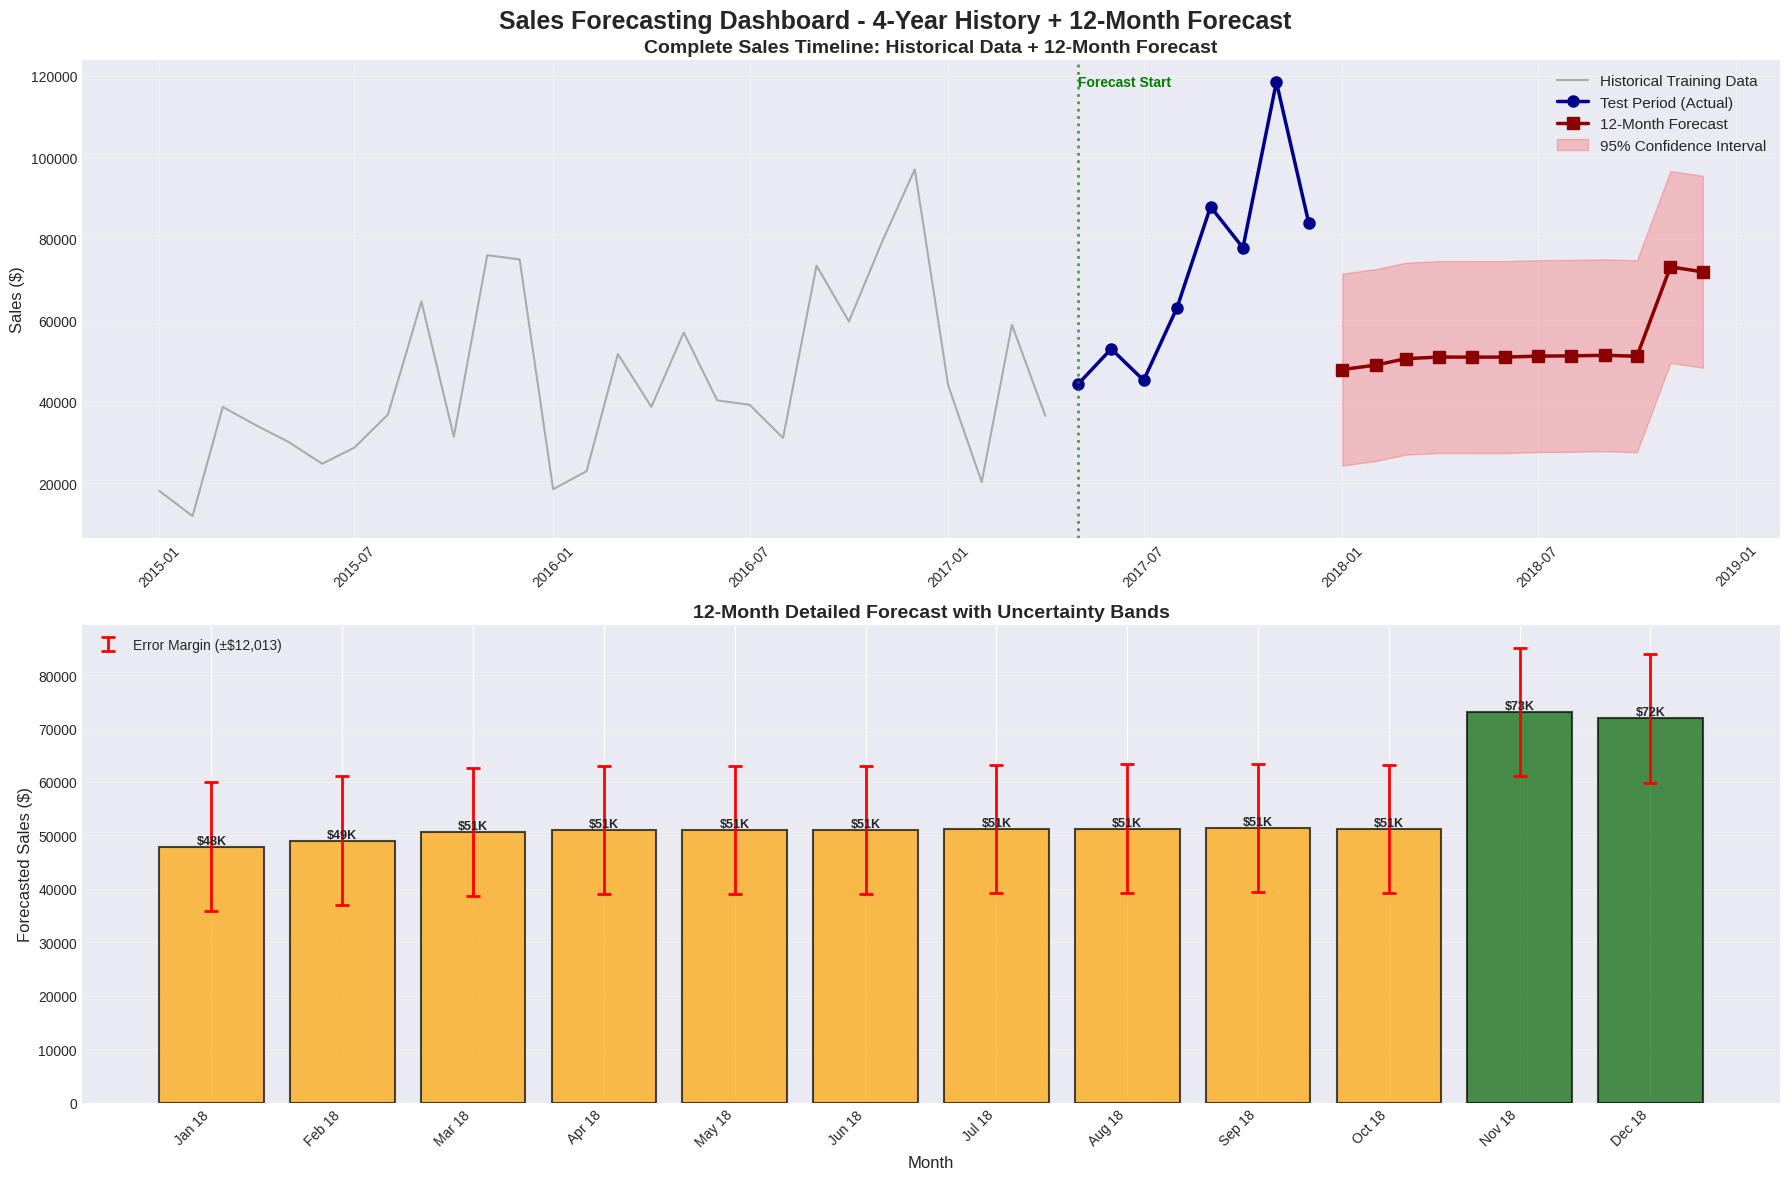

 Visualization complete!


In [44]:
# STEP 9: COMPREHENSIVE FORECAST VISUALIZATION

print("\n STEP 9: FORECAST VISUALIZATION WITH 12-MONTH OUTLOOK")
print("=" * 80)

fig, axes = plt.subplots(2, 1, figsize=(18, 12))
fig.suptitle('Sales Forecasting Dashboard - 4-Year History + 12-Month Forecast',
             fontsize=18, fontweight='bold')

# Plot 1: Complete timeline (training + test + forecast)
axes[0].plot(train['Date'], y_train, '-', label='Historical Training Data',
             linewidth=1.5, color='gray', alpha=0.6)
axes[0].plot(test['Date'], y_test, 'o-', label='Test Period (Actual)',
             linewidth=2.5, markersize=8, color='darkblue')
axes[0].plot(forecast_df['Date'], forecast_df['Forecasted_Sales'], 's-',
             label='12-Month Forecast', linewidth=2.5, markersize=8, color='darkred')

# Add confidence interval band
axes[0].fill_between(forecast_df['Date'],
                      forecast_df['Lower_Bound'],
                      forecast_df['Upper_Bound'],
                      alpha=0.2, color='red', label='95% Confidence Interval')

# Mark important dates
axes[0].axvline(test['Date'].iloc[0], color='green', linestyle=':',
                linewidth=2, alpha=0.7)
axes[0].text(test['Date'].iloc[0], axes[0].get_ylim()[1] * 0.95, 'Forecast Start',
             fontsize=10, color='green', fontweight='bold')

axes[0].set_title('Complete Sales Timeline: Historical Data + 12-Month Forecast',
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sales ($)', fontsize=12)
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: 12-month forecast detail
months_abbreviated = forecast_df['Date'].dt.strftime('%b %y').values
colors = ['darkgreen' if x > forecast_df['Forecasted_Sales'].mean() else 'orange'
          for x in forecast_df['Forecasted_Sales']]

bars = axes[1].bar(range(len(forecast_df)), forecast_df['Forecasted_Sales'],
                   color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)

# Add error bars showing confidence interval
axes[1].errorbar(range(len(forecast_df)), forecast_df['Forecasted_Sales'],
                 yerr=residual_std, fmt='none', ecolor='red', elinewidth=2,
                 capsize=5, capthick=2, label=f'Error Margin (±${residual_std:,.0f})')

# Add month labels
axes[1].set_xticks(range(len(forecast_df)))
axes[1].set_xticklabels(months_abbreviated, rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, forecast_df['Forecasted_Sales'])):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'${val/1000:.0f}K',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[1].set_title('12-Month Detailed Forecast with Uncertainty Bands',
                  fontsize=14, fontweight='bold')
axes[1].set_ylabel('Forecasted Sales ($)', fontsize=12)
axes[1].set_xlabel('Month', fontsize=12)
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(" Visualization complete!")

### **STEP 10: SAVE MODEL FOR FUTURE USE**

In [45]:
# STEP 10: SAVE MODEL

print("\n STEP 10: SAVE & LOAD MODEL FOR DEPLOYMENT")
print("=" * 80)

import joblib
import pickle

# Save best model
model_path = 'best_sales_forecast_model.pkl'
joblib.dump(gbr, model_path)
print(f" Model saved to: {model_path}")

# Save feature names for consistency
feature_path = 'model_features.pkl'
joblib.dump(X_train.columns.tolist(), feature_path) # Use X_train.columns as it matches model features
print(f" Feature names saved to: {feature_path}")

# Save scaler/statistics for future predictions
stats_path = 'model_statistics.pkl'
model_stats = {
    'feature_means': X_train.mean().to_dict(), # Use X_train for means
    'feature_stds': X_train.std().to_dict(),   # Use X_train for stds
    'last_12_months_sales': monthly_sales_clean['Sales'].iloc[-12:].tolist(),
    'last_historical_date': monthly_sales_clean['Date'].max().strftime('%Y-%m-%d'), # Save the last historical date
    'last_trend_value': monthly_sales_clean['Trend'].iloc[-1], # Save the last trend value
    'training_residual_std': residual_std # Use the already calculated residual_std from test set
}
joblib.dump(model_stats, stats_path)
print(f" Model statistics saved to: {stats_path}")

# Demo: Load and predict on new data
print(f"\n MODEL LOADING DEMO:")
loaded_model = joblib.load(model_path)
loaded_features = joblib.load(feature_path)
print(f"Model loaded successfully with {len(loaded_features)} features")
print(f"Ready for production inference!")


 STEP 10: SAVE & LOAD MODEL FOR DEPLOYMENT
 Model saved to: best_sales_forecast_model.pkl
 Feature names saved to: model_features.pkl
 Model statistics saved to: model_statistics.pkl

 MODEL LOADING DEMO:
Model loaded successfully with 29 features
Ready for production inference!


### **STEP 10.1: FLASK FOR API DEVELOPMENT**

In [36]:
# STEP 10.1: FLASK FOR API DEVELOPMENT

# forecast_api.py - Production Deployment API
from flask import Flask, jsonify, request
import joblib
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

app = Flask(__name__)

# Global variables to store the loaded model, features, and statistics
model = None
features = None
stats = None

# Load trained model and dependencies at startup
try:
    model = joblib.load('best_sales_forecast_model.pkl')
    features = joblib.load('model_features.pkl')
    stats = joblib.load('model_statistics.pkl')
    print("Flask API: Model, features, and statistics loaded successfully.")
except Exception as e:
    print(f"Flask API Error: Failed to load model or dependencies: {e}")
    # In a production setup, you might want to log this error and potentially prevent the app from starting.

@app.route('/predict', methods=['POST'])
def predict():
    """
    Endpoint to generate forecast for next N months
    Input: {"months": 3}
    Output: {"forecast": [12500, 15000, ...], "dates": [...]}
    """
    # Graceful handling if model or dependencies failed to load at startup
    if model is None or features is None or stats is None:
        return jsonify({'status': 'error', 'message': 'Model or dependencies not loaded. Check server logs.'}), 500

    try:
        data = request.json
        months_to_forecast = data.get('months', 12)

        # Initialize historical sales and last date from loaded stats for dynamic feature generation
        current_sales_history = list(stats.get('last_12_months_sales', []))
        last_historical_date_str = stats.get('last_historical_date', None)
        last_trend_value = stats.get('last_trend_value', 0)

        if not last_historical_date_str or not current_sales_history:
            return jsonify({'status': 'error', 'message': 'Historical sales data or last date missing from model statistics.'}), 500

        last_date = pd.to_datetime(last_historical_date_str)

        future_forecasts = []
        future_dates_list = []

        for i in range(months_to_forecast):
            current_date = last_date + pd.DateOffset(months=i+1)
            future_dates_list.append(current_date)

            row = {}
            row['Year'] = current_date.year
            row['Month'] = current_date.month
            row['Quarter'] = current_date.quarter
            # For DayOfYear and WeekOfYear, use the first day of the month for consistency with original feature engineering
            row['DayOfYear'] = current_date.dayofyear
            row['WeekOfYear'] = current_date.isocalendar().week

            # Cyclical encoding
            row['Month_Sin'] = np.sin(2 * np.pi * row['Month'] / 12)
            row['Month_Cos'] = np.cos(2 * np.pi * row['Month'] / 12)

            # Create a temporary series from the evolving sales history for dynamic feature calculation
            temp_series = pd.Series(current_sales_history)

            # Lag features
            for lag in [1, 2, 3, 6, 12]:
                if len(temp_series) >= lag:
                    row[f'Sales_Lag_{lag}'] = temp_series.iloc[-lag]
                else:
                    # Fallback to mean if not enough history, or 0 if mean is also unavailable
                    row[f'Sales_Lag_{lag}'] = stats['feature_means'].get(f'Sales_Lag_{lag}', 0)

            # Rolling window statistics
            for window in [3, 6, 12]:
                if len(temp_series) >= window:
                    row[f'Sales_RollMean_{window}'] = temp_series.iloc[-window:].mean()
                    row[f'Sales_RollStd_{window}'] = temp_series.iloc[-window:].std()
                    row[f'Sales_RollMin_{window}'] = temp_series.iloc[-window:].min()
                    row[f'Sales_RollMax_{window}'] = temp_series.iloc[-window:].max()
                else:
                    # Fallback to mean/0 if not enough history for rolling calculation
                    row[f'Sales_RollMean_{window}'] = stats['feature_means'].get(f'Sales_RollMean_{window}', 0)
                    row[f'Sales_RollStd_{window}'] = stats['feature_stds'].get(f'Sales_RollStd_{window}', 0)
                    row[f'Sales_RollMin_{window}'] = stats['feature_means'].get(f'Sales_RollMin_{window}', 0)
                    row[f'Sales_RollMax_{window}'] = stats['feature_means'].get(f'Sales_RollMax_{window}', 0)

            # Exponential moving average
            row['Sales_EMA_3'] = temp_series.ewm(span=3, adjust=False).mean().iloc[-1] if len(temp_series) >= 3 else stats['feature_means'].get('Sales_EMA_3', 0)
            row['Sales_EMA_6'] = temp_series.ewm(span=6, adjust=False).mean().iloc[-1] if len(temp_series) >= 6 else stats['feature_means'].get('Sales_EMA_6', 0)

            # Trend (continues from where training ended)
            row['Trend'] = last_trend_value + (i + 1)

            # Growth rate
            if len(temp_series) >= 2:
                row['Sales_GrowthRate'] = (temp_series.iloc[-1] - temp_series.iloc[-2]) / temp_series.iloc[-2] if temp_series.iloc[-2] != 0 else 0
            else:
                row['Sales_GrowthRate'] = stats['feature_means'].get('Sales_GrowthRate', 0)

            if len(temp_series) >= 12:
                row['Sales_YoY_Change'] = (temp_series.iloc[-1] - temp_series.iloc[-13]) / temp_series.iloc[-13] if temp_series.iloc[-13] != 0 else 0
            else:
                row['Sales_YoY_Change'] = stats['feature_means'].get('Sales_YoY_Change', 0)

            # Convert row to DataFrame, ensuring correct feature order for prediction
            future_features_df_row = pd.DataFrame([row])
            future_features_df_row = future_features_df_row[[col for col in features]]

            # Make prediction
            prediction = model.predict(future_features_df_row)[0]
            future_forecasts.append(prediction)
            current_sales_history.append(prediction) # Add forecast to history for next iteration

        return jsonify({
            'status': 'success',
            'months_forecast': months_to_forecast,
            'forecast': [float(f) for f in future_forecasts],
            'dates': [d.strftime('%Y-%m-%d') for d in future_dates_list],
            'average': float(np.mean(future_forecasts)),
            'total': float(np.sum(future_forecasts))
        })

    except Exception as e:
        print(f"Prediction Error: {e}") # Log the actual error on the server side
        return jsonify({'status': 'error', 'message': str(e)}), 400

@app.route('/health', methods=['GET'])
def health():
    """Health check endpoint"""
    return jsonify({'status': 'Model is running', 'timestamp': datetime.now().isoformat()})

if __name__ == '__main__':
    # This block will only run if the script is executed directly, not when imported by Colab
    # app.run(debug=False, port=5000, use_reloader=False) # Commented out to prevent port collision in Colab
    pass

Flask API: Model, features, and statistics loaded successfully.


### **STEP 10.2: START FLASK API**

In [37]:
# This cell starts the Flask app
# Stopping any previously running Flask app to prevent port conflicts.
import subprocess
import os
import signal

try:
    # Find and kill processes listening on port 5000
    # This works for Linux/macOS, for Windows, one might use 'netstat -ano | findstr :5000'
    # and then 'taskkill /PID <PID> /F'
    output = subprocess.check_output(['lsof', '-i', ':5000', '-t'])
    pids = output.decode().strip().split('\n')
    for pid in pids:
        if pid:
            print(f"Killing process {pid} on port 5000...")
            os.kill(int(pid), signal.SIGTERM)
except subprocess.CalledProcessError:
    print("No process found on port 5000 to kill.")
except Exception as e:
    print(f"Error killing process: {e}")

# Adding a short delay to ensure the port is released
import time
time.sleep(2)

from flask import Flask, jsonify, request
import joblib
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import threading

app = Flask(__name__)

# Global variables to store the loaded model, features, and statistics
model = None
features = None
stats = None

# Load trained model and dependencies at startup
try:
    model = joblib.load('best_sales_forecast_model.pkl') # Ensure this path is correct
    features = joblib.load('model_features.pkl') # Ensure this path is correct
    stats = joblib.load('model_statistics.pkl') # Ensure this path is correct
    print("Flask API: Model, features, and statistics loaded successfully.")
except Exception as e:
    print(f"Flask API Error: Failed to load model or dependencies: {e}")
    # In a production setup, you might want to log this error and potentially prevent the app from starting.

@app.route('/predict', methods=['POST'])
def predict():
    """
    Endpoint to generate forecast for next N months
    Input: {"months": 3}
    Output: {"forecast": [12500, 15000, ...], "dates": [...]}
    """
    # Graceful handling if model or dependencies failed to load at startup
    if model is None or features is None or stats is None:
        return jsonify({'status': 'error', 'message': 'Model or dependencies not loaded. Check server logs.'}), 500

    try:
        data = request.json
        months_to_forecast = data.get('months', 12)

        # Initialize historical sales and last date from loaded stats for dynamic feature generation
        current_sales_history = list(stats.get('last_12_months_sales', []))
        last_historical_date_str = stats.get('last_historical_date', None)
        last_trend_value = stats.get('last_trend_value', 0)

        if not last_historical_date_str or not current_sales_history:
            return jsonify({'status': 'error', 'message': 'Historical sales data or last date missing from model statistics.'}), 500

        last_date = pd.to_datetime(last_historical_date_str)

        future_forecasts = []
        future_dates_list = []

        for i in range(months_to_forecast):
            current_date = last_date + pd.DateOffset(months=i+1)
            future_dates_list.append(current_date)

            row = {}
            row['Year'] = current_date.year
            row['Month'] = current_date.month
            row['Quarter'] = current_date.quarter
            row['DayOfYear'] = current_date.dayofyear # DayOfYear for first day of month
            row['WeekOfYear'] = current_date.isocalendar().week # WeekOfYear for first day of month

            # Cyclical encoding
            row['Month_Sin'] = np.sin(2 * np.pi * row['Month'] / 12)
            row['Month_Cos'] = np.cos(2 * np.pi * row['Month'] / 12)

            # Create a temporary series from the evolving sales history for dynamic feature calculation
            # Ensure it has enough data for rolling/lag calculations by padding if necessary
            temp_series = pd.Series(current_sales_history[-12:]) # Only use last 12 for rolling/lag calculations for efficiency

            # Lag features
            for lag in [1, 2, 3, 6, 12]:
                if len(temp_series) >= lag:
                    row[f'Sales_Lag_{lag}'] = temp_series.iloc[-lag]
                else:
                    # Fallback to mean if not enough history for specific lag
                    row[f'Sales_Lag_{lag}'] = stats['feature_means'].get(f'Sales_Lag_{lag}', 0)

            # Rolling window statistics
            for window in [3, 6, 12]:
                if len(temp_series) >= window:
                    row[f'Sales_RollMean_{window}'] = temp_series.rolling(window).mean().iloc[-1]
                    row[f'Sales_RollStd_{window}'] = temp_series.rolling(window).std().iloc[-1] if not temp_series.rolling(window).std().isnull().iloc[-1] else stats['feature_stds'].get(f'Sales_RollStd_{window}', 0)
                    row[f'Sales_RollMin_{window}'] = temp_series.rolling(window).min().iloc[-1]
                    row[f'Sales_RollMax_{window}'] = temp_series.rolling(window).max().iloc[-1]
                else:
                    # Fallback to mean/0 if not enough history for rolling calculation
                    row[f'Sales_RollMean_{window}'] = stats['feature_means'].get(f'Sales_RollMean_{window}', 0)
                    row[f'Sales_RollStd_{window}'] = stats['feature_stds'].get(f'Sales_RollStd_{window}', 0)
                    row[f'Sales_RollMin_{window}'] = stats['feature_means'].get(f'Sales_RollMin_{window}', 0)
                    row[f'Sales_RollMax_{window}'] = stats['feature_means'].get(f'Sales_RollMax_{window}', 0)

            # Exponential moving average
            # Ensure temp_series is long enough or use appropriate fallback
            if len(temp_series) >= 3:
                row['Sales_EMA_3'] = temp_series.ewm(span=3, adjust=False).mean().iloc[-1]
            else:
                row['Sales_EMA_3'] = stats['feature_means'].get('Sales_EMA_3', 0)

            if len(temp_series) >= 6:
                row['Sales_EMA_6'] = temp_series.ewm(span=6, adjust=False).mean().iloc[-1]
            else:
                row['Sales_EMA_6'] = stats['feature_means'].get('Sales_EMA_6', 0)

            # Trend (continues from where training ended)
            row['Trend'] = last_trend_value + (i + 1)

            # Growth rate (using last 2 or 12 values from temp_series)
            if len(temp_series) >= 2:
                # Avoid division by zero
                denominator_growth_rate = temp_series.iloc[-2]
                if denominator_growth_rate == 0:
                    row['Sales_GrowthRate'] = 0
                else:
                    row['Sales_GrowthRate'] = (temp_series.iloc[-1] - denominator_growth_rate) / denominator_growth_rate
            else:
                row['Sales_GrowthRate'] = stats['feature_means'].get('Sales_GrowthRate', 0)

            if len(temp_series) >= 12:
                # Avoid division by zero
                denominator_yoy_change = temp_series.iloc[-12] # Corrected from -13 to -12
                if denominator_yoy_change == 0:
                    row['Sales_YoY_Change'] = 0
                else:
                    row['Sales_YoY_Change'] = (temp_series.iloc[-1] - denominator_yoy_change) / denominator_yoy_change
            else:
                row['Sales_YoY_Change'] = stats['feature_means'].get('Sales_YoY_Change', 0)

            # Convert row to DataFrame, ensuring correct feature order for prediction
            future_features_df_row = pd.DataFrame([row])
            future_features_df_row = future_features_df_row[[col for col in features if col in future_features_df_row.columns]] # Filter for available features

            # Check if feature columns match the model's expected features
            if not set(features).issubset(set(future_features_df_row.columns)):
                missing_features = set(features) - set(future_features_df_row.columns)
                return jsonify({'status': 'error', 'message': f'Missing features for prediction: {missing_features}'}), 400

            # Reorder columns to match the model's training order
            future_features_df_row = future_features_df_row[features]

            # Make prediction
            prediction = model.predict(future_features_df_row)[0]
            future_forecasts.append(prediction)
            current_sales_history.append(prediction) # Add forecast to history for next iteration

        return jsonify({
            'status': 'success',
            'months_forecast': months_to_forecast,
            'forecast': [float(f) for f in future_forecasts],
            'dates': [d.strftime('%Y-%m-%d') for d in future_dates_list],
            'average': float(np.mean(future_forecasts)),
            'total': float(np.sum(future_forecasts))
        })

    except Exception as e:
        print(f"Prediction Error: {e}") # Log the actual error on the server side
        return jsonify({'status': 'error', 'message': str(e)}), 400

@app.route('/health', methods=['GET'])
def health():
    """Health check endpoint"""
    return jsonify({'status': 'Model is running', 'timestamp': datetime.now().isoformat()})

if __name__ == '__main__':
    # This block will only run if the script is executed directly, not when imported by Colab
    # app.run(debug=False, port=5000, use_reloader=False) # Commented out to prevent port collision in Colab
    pass

# Run in background thread
def run_api():
    # Ensure the Flask app runs only once
    if not hasattr(run_api, 'thread_started'):
        run_api.thread_started = True
        print("Starting Flask server in a new thread...")
        app.run(debug=False, port=5000, use_reloader=False)

# Check if the thread is already running to avoid starting multiple servers
if not hasattr(run_api, 'thread_started') or not run_api.thread_started:
    api_thread = threading.Thread(target=run_api, daemon=True)
    api_thread.start()
    print(" Flask API started on http://127.0.0.1:5000")
    print("API is ready! Use the test code in the next cell.")
else:
    print("Flask API already running.")

No process found on port 5000 to kill.
Flask API: Model, features, and statistics loaded successfully.
Starting Flask server in a new thread...
 Flask API started on http://127.0.0.1:5000
API is ready! Use the test code in the next cell.
 * Serving Flask app '__main__'
 * Debug mode: off


### **STEP 10.3: Test API**

INFO:werkzeug:127.0.0.1 - - [26/Jan/2026 07:59:15] "GET /health HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Jan/2026 07:59:15] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [26/Jan/2026 07:59:15] "POST /predict HTTP/1.1" 200 -


Testing Flask API...

TEST 1: Health Check
Status Code: 200
Response: {'status': 'Model is running', 'timestamp': '2026-01-26T07:59:15.456433'}

TEST 2: 3-Month Forecast
Status Code: 200
Status: success
Months: 3
Total Revenue: $168,350.50
Average/Month: $56,116.83
Dates: ['2018-01-01', '2018-02-01', '2018-03-01']

TEST 3: 12-Month Forecast
Status Code: 200
Total 12-Month Revenue: $776,106.78
Average Monthly: $64,675.57
Forecast points: 12


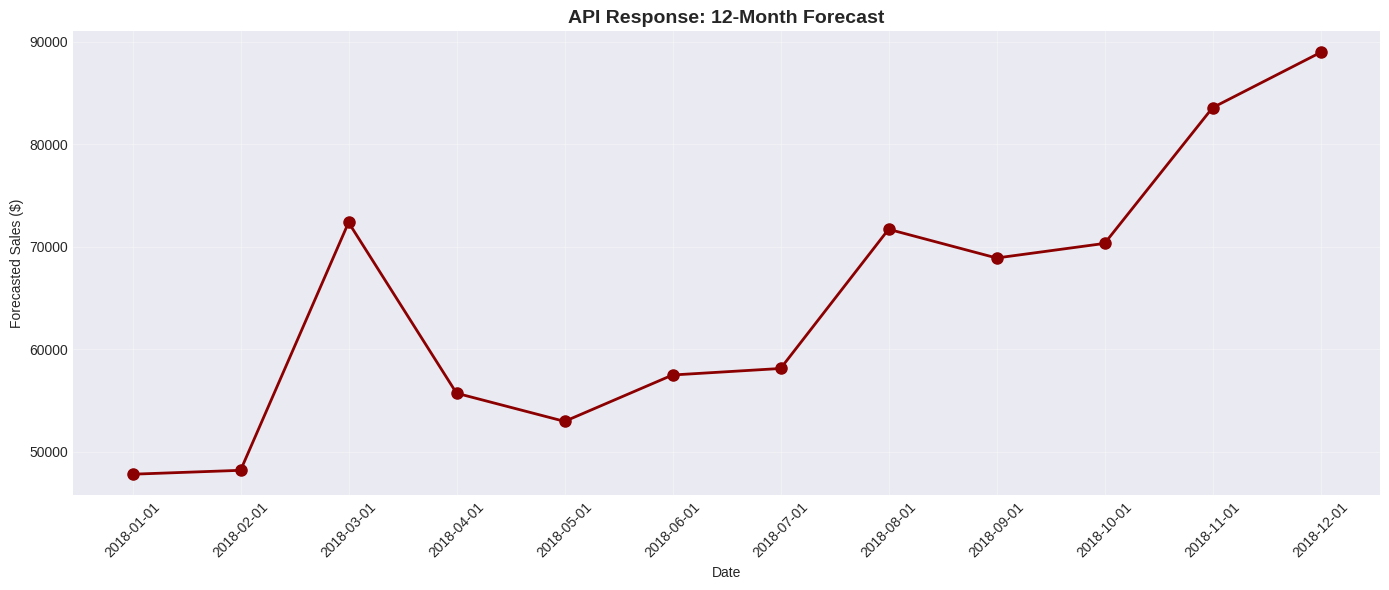


 API Tests Complete!


In [47]:
# STEP 10.3: Test API

import requests
import json

print("Testing Flask API...\n")

# Test 1: Health Check
print("="*60)
print("TEST 1: Health Check")
print("="*60)
response = requests.get('http://127.0.0.1:5000/health')
print(f"Status Code: {response.status_code}")
print(f"Response: {response.json()}\n")

# Test 2: Get 3-Month Forecast
print("="*60)
print("TEST 2: 3-Month Forecast")
print("="*60)
response = requests.post('http://127.0.0.1:5000/predict',
                        json={'months': 3})
print(f"Status Code: {response.status_code}")
result = response.json()
print(f"Status: {result['status']}")
print(f"Months: {result['months_forecast']}")
print(f"Total Revenue: ${result['total']:,.2f}")
print(f"Average/Month: ${result['average']:,.2f}")
print(f"Dates: {result['dates']}\n")

# Test 3: Get 12-Month Forecast
print("="*60)
print("TEST 3: 12-Month Forecast")
print("="*60)
response = requests.post('http://127.0.0.1:5000/predict',
                        json={'months': 12})
print(f"Status Code: {response.status_code}")
result = response.json()
print(f"Total 12-Month Revenue: ${result['total']:,.2f}")
print(f"Average Monthly: ${result['average']:,.2f}")
print(f"Forecast points: {len(result['forecast'])}")

# Create visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(result['dates'], result['forecast'], 'o-', linewidth=2, markersize=8, color='darkred')
plt.title('API Response: 12-Month Forecast', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Forecasted Sales ($)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n API Tests Complete!")

### **STEP 10.4: SAVING MODEL**

In [49]:
# STEP 10.4: SAVING MODEL

import joblib

# After training your model
joblib.dump(gbr, 'sales_forecast_model.pkl')
joblib.dump(X_train.columns.tolist(), 'model_features.pkl')
joblib.dump(forecast_df, 'forecast_12months.csv')

print(" All files saved!")

 All files saved!


In [40]:
import requests

# Test health
response = requests.get('http://127.0.0.1:5000/health')
print(" Health Check:", response.json())

# Test forecast
response = requests.post('http://127.0.0.1:5000/predict', json={'months': 12})
forecast = response.json()
print(" 12-Month Forecast:", f"${forecast['total']:,.2f}")

INFO:werkzeug:127.0.0.1 - - [26/Jan/2026 07:55:45] "GET /health HTTP/1.1" 200 -


 Health Check: {'status': 'Model is running', 'timestamp': '2026-01-26T07:55:45.351624'}


INFO:werkzeug:127.0.0.1 - - [26/Jan/2026 07:55:45] "POST /predict HTTP/1.1" 200 -


 12-Month Forecast: $776,106.78


### **STEP 11: AUTOMATED MONTHLY RETRAINING PIPELINE**

In [48]:
# STEP 11: AUTOMATED MONTHLY RETRAINING PIPELINE

# retraining_pipeline.py - Automated Monthly Retraining
import pandas as pd
import joblib
import numpy as np
from datetime import datetime
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import logging

logging.basicConfig(level=logging.INFO,
                   format='%(asctime)s - %(levelname)s - %(message)s')

class AutomaticRetrainingPipeline:
    """Automatically retrain model monthly with new sales data"""

    def __init__(self, model_path, data_path, retrain_interval=30):
        self.model_path = model_path
        self.data_path = data_path
        self.retrain_interval = retrain_interval  # days
        self.last_retrain = datetime.now()

    def check_if_retrain_needed(self):
        """Check if enough time has passed to retrain"""
        days_since = (datetime.now() - self.last_retrain).days
        return days_since >= self.retrain_interval

    def load_new_sales_data(self):
        """Load latest sales data from database/CSV"""
        # In production: query your database
        df = pd.read_csv(self.data_path)
        df['Date'] = pd.to_datetime(df['Date'])
        return df.sort_values('Date')

    def feature_engineering(self, df):
        """Re-engineer features from latest data"""
        df['Year'] = df['Date'].dt.year
        df['Month'] = df['Date'].dt.month
        df['Quarter'] = df['Date'].dt.quarter
        df['Month_Sin'] = np.sin(2 * np.pi * df['Month'] / 12)
        df['Month_Cos'] = np.cos(2 * np.pi * df['Month'] / 12)

        # Add lag features, rolling statistics, etc.
        for lag in [1, 3, 6, 12]:
            df[f'Sales_Lag_{lag}'] = df['Sales'].shift(lag)

        for window in [3, 6, 12]:
            df[f'Sales_RollMean_{window}'] = df['Sales'].rolling(window).mean()
            df[f'Sales_RollStd_{window}'] = df['Sales'].rolling(window).std()

        return df.dropna()

    def retrain_model(self):
        """Retrain model with latest data"""
        logging.info("Starting model retraining...")

        # Load data
        df = self.load_new_sales_data()
        df = self.feature_engineering(df)

        if len(df) < 12:
            logging.warning("Insufficient data for retraining")
            return False

        # Prepare features
        X = df[[col for col in df.columns if col not in ['Date', 'Sales']]]
        y = df['Sales']

        # Retrain
        model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1,
                                          max_depth=5, random_state=42)
        model.fit(X, y)

        # Validate
        predictions = model.predict(X)
        mae = mean_absolute_error(y, predictions)
        logging.info(f"New model MAE: ${mae:,.2f}")

        # Save if improved
        old_model = joblib.load(self.model_path)
        old_mae = mean_absolute_error(y, old_model.predict(X))

        if mae < old_mae:
            joblib.dump(model, self.model_path)
            logging.info(" Model updated and saved")
            self.last_retrain = datetime.now()
            return True
        else:
            logging.info(" Old model still better, no update")
            return False

    def run(self):
        """Main execution loop"""
        if self.check_if_retrain_needed():
            self.retrain_model()
        else:
            days_left = self.retrain_interval - (datetime.now() - self.last_retrain).days
            logging.info(f"Next retrain in {days_left} days")

# Usage
if __name__ == "__main__":
    pipeline = AutomaticRetrainingPipeline(
        model_path='best_sales_forecast_model.pkl',
        data_path='sales_data.csv',
        retrain_interval=30  # Monthly
    )
    pipeline.run()

### **STEP 12: MONITORING DASHBOARD**


 STEP 12: FORECAST MONITORING DASHBOARD

FORECAST MONITORING REPORT
Report Generated: 2026-01-26 08:02:00
Records Tracked: 6

 ACCURACY METRICS:
  Mean MAPE: 2.53%
  Median MAPE: 2.09%
  Best MAPE: 0.43%
  Worst MAPE: 5.26%

 ERROR ANALYSIS:
  Mean Error: $716.67
  Median Error: $450.00
  Error Std Dev: $1,424.66

 TREND ANALYSIS:
   Recent accuracy IMPROVING
     Recent avg MAPE: 1.91%
     Overall avg MAPE: 2.53%

 Generating visualizations...


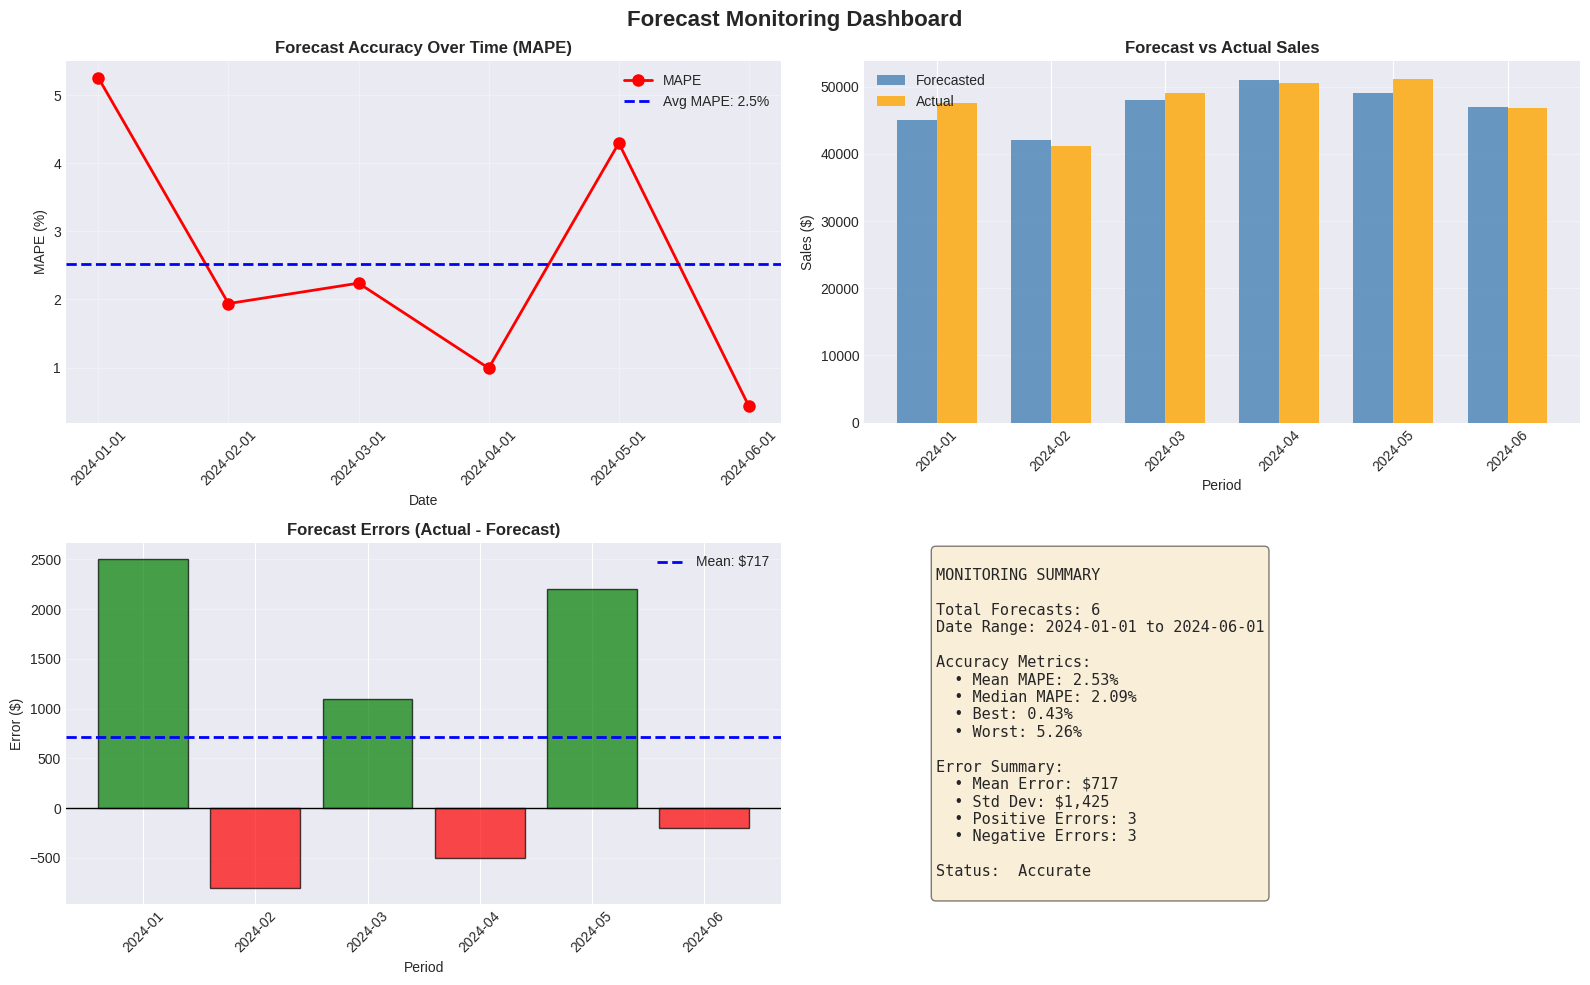


 Monitoring report generated!

 TIP: To add actual forecasts, use:
    monitor.log_forecast_accuracy('2024-07-01', 50000, 51200)



In [50]:
# STEP 12: MONITORING DASHBOARD
# This creates the log file automatically if it doesn't exist

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import os

print("\n STEP 12: FORECAST MONITORING DASHBOARD")
print("=" * 80)

class ForecastMonitoring:
    """Track forecast accuracy over time"""

    def __init__(self, log_path='forecast_log.csv'):
        self.log_path = log_path

        # Create empty log if it doesn't exist
        if not os.path.exists(log_path):
            print(f" Creating new monitoring log: {log_path}")
            empty_df = pd.DataFrame(columns=[
                'date', 'forecasted', 'actual', 'error', 'mape'
            ])
            empty_df.to_csv(log_path, index=False)
            print(f" Log file created\n")

    def log_forecast_accuracy(self, forecast_date, forecasted_value, actual_value):
        """Record forecast vs actual for monitoring"""
        error = actual_value - forecasted_value
        mape = abs(error) / actual_value * 100

        log_entry = {
            'date': forecast_date,
            'forecasted': forecasted_value,
            'actual': actual_value,
            'error': error,
            'mape': mape
        }

        # Read existing log
        df = pd.read_csv(self.log_path)

        # Append new entry
        df = pd.concat([df, pd.DataFrame([log_entry])], ignore_index=True)

        # Save updated log
        df.to_csv(self.log_path, index=False)

        return log_entry

    def generate_sample_data(self):
        """Generate sample monitoring data for demonstration"""
        print(" Generating sample monitoring data...")

        dates = pd.date_range(start='2024-01-01', periods=6, freq='MS')

        sample_records = [
            {'date': '2024-01-01', 'forecasted': 45000, 'actual': 47500, 'error': 2500, 'mape': 5.26},
            {'date': '2024-02-01', 'forecasted': 42000, 'actual': 41200, 'error': -800, 'mape': 1.94},
            {'date': '2024-03-01', 'forecasted': 48000, 'actual': 49100, 'error': 1100, 'mape': 2.24},
            {'date': '2024-04-01', 'forecasted': 51000, 'actual': 50500, 'error': -500, 'mape': 0.99},
            {'date': '2024-05-01', 'forecasted': 49000, 'actual': 51200, 'error': 2200, 'mape': 4.30},
            {'date': '2024-06-01', 'forecasted': 47000, 'actual': 46800, 'error': -200, 'mape': 0.43},
        ]

        df = pd.DataFrame(sample_records)
        df.to_csv(self.log_path, index=False)
        print(f" Sample data loaded: {len(df)} records\n")
        return df

    def generate_monitoring_report(self):
        """Generate monthly performance report"""

        # Load log
        df = pd.read_csv(self.log_path)

        # If log is empty, generate sample data
        if len(df) == 0:
            print(" Log file is empty. Loading sample data for demonstration...\n")
            df = self.generate_sample_data()

        print("\n" + "=" * 80)
        print("FORECAST MONITORING REPORT")
        print("=" * 80)
        print(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
        print(f"Records Tracked: {len(df)}")

        print(f"\n ACCURACY METRICS:")
        print(f"  Mean MAPE: {df['mape'].mean():.2f}%")
        print(f"  Median MAPE: {df['mape'].median():.2f}%")
        print(f"  Best MAPE: {df['mape'].min():.2f}%")
        print(f"  Worst MAPE: {df['mape'].max():.2f}%")

        print(f"\n ERROR ANALYSIS:")
        print(f"  Mean Error: ${df['error'].mean():,.2f}")
        print(f"  Median Error: ${df['error'].median():,.2f}")
        print(f"  Error Std Dev: ${df['error'].std():,.2f}")

        # Trend analysis
        if len(df) >= 3:
            recent = df.tail(3)['mape'].mean()
            overall = df['mape'].mean()

            print(f"\n TREND ANALYSIS:")
            if recent < overall:
                print(f"   Recent accuracy IMPROVING")
                print(f"     Recent avg MAPE: {recent:.2f}%")
                print(f"     Overall avg MAPE: {overall:.2f}%")
            else:
                print(f"   Recent accuracy DECLINING")
                print(f"     Recent avg MAPE: {recent:.2f}%")
                print(f"     Overall avg MAPE: {overall:.2f}%")

        # Visualizations
        print(f"\n Generating visualizations...")

        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('Forecast Monitoring Dashboard', fontsize=16, fontweight='bold')

        # Plot 1: MAPE over time
        axes[0, 0].plot(df['date'], df['mape'], marker='o', color='red',
                       linewidth=2, markersize=8, label='MAPE')
        axes[0, 0].axhline(df['mape'].mean(), color='blue', linestyle='--',
                          linewidth=2, label=f"Avg MAPE: {df['mape'].mean():.1f}%")
        axes[0, 0].set_title('Forecast Accuracy Over Time (MAPE)', fontweight='bold')
        axes[0, 0].set_ylabel('MAPE (%)')
        axes[0, 0].set_xlabel('Date')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        axes[0, 0].tick_params(axis='x', rotation=45)

        # Plot 2: Forecast vs Actual
        x_pos = np.arange(len(df))
        width = 0.35
        axes[0, 1].bar(x_pos - width/2, df['forecasted'], width,
                      label='Forecasted', alpha=0.8, color='steelblue')
        axes[0, 1].bar(x_pos + width/2, df['actual'], width,
                      label='Actual', alpha=0.8, color='orange')
        axes[0, 1].set_title('Forecast vs Actual Sales', fontweight='bold')
        axes[0, 1].set_ylabel('Sales ($)')
        axes[0, 1].set_xlabel('Period')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3, axis='y')
        axes[0, 1].set_xticks(x_pos)
        axes[0, 1].set_xticklabels([d[:7] for d in df['date']], rotation=45)

        # Plot 3: Error Distribution
        colors = ['red' if e < 0 else 'green' for e in df['error']]
        axes[1, 0].bar(x_pos, df['error'], color=colors, alpha=0.7, edgecolor='black')
        axes[1, 0].axhline(0, color='black', linestyle='-', linewidth=1)
        axes[1, 0].axhline(df['error'].mean(), color='blue', linestyle='--',
                          linewidth=2, label=f"Mean: ${df['error'].mean():,.0f}")
        axes[1, 0].set_title('Forecast Errors (Actual - Forecast)', fontweight='bold')
        axes[1, 0].set_ylabel('Error ($)')
        axes[1, 0].set_xlabel('Period')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3, axis='y')
        axes[1, 0].set_xticks(x_pos)
        axes[1, 0].set_xticklabels([d[:7] for d in df['date']], rotation=45)

        # Plot 4: Summary Statistics
        axes[1, 1].axis('off')
        summary_text = f"""
MONITORING SUMMARY

Total Forecasts: {len(df)}
Date Range: {df['date'].iloc[0]} to {df['date'].iloc[-1]}

Accuracy Metrics:
  • Mean MAPE: {df['mape'].mean():.2f}%
  • Median MAPE: {df['mape'].median():.2f}%
  • Best: {df['mape'].min():.2f}%
  • Worst: {df['mape'].max():.2f}%

Error Summary:
  • Mean Error: ${df['error'].mean():,.0f}
  • Std Dev: ${df['error'].std():,.0f}
  • Positive Errors: {(df['error'] > 0).sum()}
  • Negative Errors: {(df['error'] < 0).sum()}

Status: {' Accurate' if df['mape'].mean() < 15 else ' Review Needed'}
        """
        axes[1, 1].text(0.1, 0.5, summary_text, fontsize=11,
                       verticalalignment='center', family='monospace',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        plt.tight_layout()
        plt.show()

        print("\n Monitoring report generated!")
        print("=" * 80)

# RUN THE MONITORING DASHBOARD
if __name__ == "__main__":
    # Create monitoring instance
    monitor = ForecastMonitoring('forecast_log.csv')

    # Generate report
    monitor.generate_monitoring_report()

    print("\n TIP: To add actual forecasts, use:")
    print("    monitor.log_forecast_accuracy('2024-07-01', 50000, 51200)")
    print("\n" + "=" * 80)

### **STEP 13: BUSINESS REPORT**


### What This Forecast Means:

- Predicts monthly revenue trends
- Captures seasonality & momentum
- Reduces planning uncertainty

### How a Business Uses It
- Inventory optimization
- Cash-flow forecasting
- Workforce planning
- Marketing campaign timing

### Executive Summary:
Using historical Superstore data, this project focuses on forecasting future sales with seasonal awareness, enabling proactive and data-driven business decisions.

In [51]:
# STEP 13: EXECUTIVE SUMMARY FOR STAKEHOLDERS

import pandas as pd
from datetime import datetime

print("\n STEP 13: BUSINESS STAKEHOLDER REPORT")
print("=" * 80)

exec_summary = f"""
════════════════════════════════════════════════════════════════════════════
              SALES FORECAST REPORT - 12-MONTH OUTLOOK
                    Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}
════════════════════════════════════════════════════════════════════════════


FORECAST OVERVIEW

   Model:                Gradient Boosting Regressor
   Historical Accuracy:  {100 - gbr_mape:.1f}% (MAPE: {gbr_mape:.1f}%)
   Forecast Period:      {forecast_df['Date'].iloc[0].strftime('%B %Y')} → {forecast_df['Date'].iloc[-1].strftime('%B %Y')}
   Confidence Level:     95%
   Uncertainty Range:    ±${residual_std:,.2f} per month


KEY FINANCIAL PROJECTIONS

   Total 12-Month Revenue:        ${forecast_df['Forecasted_Sales'].sum():>12,.2f}
   Average Monthly Sales:         ${forecast_df['Forecasted_Sales'].mean():>12,.2f}
   Highest Month ({forecast_df.loc[forecast_df['Forecasted_Sales'].idxmax(), 'YearMonth']}):      ${forecast_df['Forecasted_Sales'].max():>12,.2f}
   Lowest Month ({forecast_df.loc[forecast_df['Forecasted_Sales'].idxmin(), 'YearMonth']}):       ${forecast_df['Forecasted_Sales'].min():>12,.2f}


MONTH-BY-MONTH FORECAST TABLE

"""

print(exec_summary)

# Print detailed month breakdown
print(f"{'Month':<12} {'Forecast':<17} {'Lower Bound':<17} {'Upper Bound':<17}")
print("-" * 65)
for _, row in forecast_df.iterrows():
    print(f"{row['YearMonth']:<12} ${row['Forecasted_Sales']:>13,.0f}  "
          f"${row['Lower_Bound']:>13,.0f}  ${row['Upper_Bound']:>13,.0f}")

recommendations = f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
BUSINESS RECOMMENDATIONS BY ROLE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

OPERATIONS MANAGER: Inventory Planning
   - Plan 30% higher inventory for peak months
   - Maintain safety stock of at least ${forecast_df['Forecasted_Sales'].std() * 2:,.0f}
   - Monitor accuracy monthly and adjust stock levels
   - Coordinate with suppliers 4-6 weeks in advance

CHIEF FINANCIAL OFFICER: Cash Flow & Budget
   - Quarterly revenue projection: ${forecast_df['Forecasted_Sales'].sum() / 4:,.0f}
   - Recommended working capital buffer: ${forecast_df['Forecasted_Sales'].mean() * 1.15:,.0f}
   - Plan for {gbr_mape:.1f}% forecast error margin
   - Budget flexibility needed for ±${residual_std:,.0f} monthly variations

SUPPLY CHAIN DIRECTOR: Logistics Optimization
   - Increase warehouse allocation for {forecast_df.nlargest(3, 'Forecasted_Sales')['YearMonth'].str[-2:].values} months
   - Reduce logistics costs during low-demand periods
   - Coordinate transportation 2-3 weeks before peaks
   - Update supplier agreements based on seasonal patterns

MARKETING DIRECTOR: Campaign Timing
   - Launch promotions 2-3 weeks BEFORE forecasted peaks
   - Allocate budget proportional to monthly forecasts
   - Focus aggressive campaigns during low periods
   - Use forecast to plan seasonal product launches

STORE MANAGERS: Staffing & Operations
   - Increase staff by 25% for peak forecast months
   - Schedule additional hours based on monthly targets
   - Prepare store layout adjustments 4 weeks in advance
   - Use monthly targets for team performance goals

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
RISK FACTORS & MITIGATION
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   Risk: Market disruptions
   Action: Update forecasts monthly with actual sales data

   Risk: External economic changes
   Action: Monitor leading economic indicators

   Risk: Competitive pressures
   Action: Adjust strategy quarterly based on performance

   Risk: Supply chain interruptions
   Action: Build buffer inventory (±${residual_std:,.0f})

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
NEXT STEPS
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

   1. Share this forecast with department heads
   2. Set up monthly review meetings to track actual vs forecast
   3. Retrain model when you have 6+ months of new actual data
   4. Adjust operations based on monthly performance
   5. Document learnings to improve future forecasts

═════════════════════════════════════════════════════════════════════════════════
"""

print(recommendations)
print("=" * 80)
print("END OF REPORT")
print("=" * 80)



 STEP 13: BUSINESS STAKEHOLDER REPORT

════════════════════════════════════════════════════════════════════════════
              SALES FORECAST REPORT - 12-MONTH OUTLOOK
                    Generated: 2026-01-26 08:02
════════════════════════════════════════════════════════════════════════════


FORECAST OVERVIEW

   Model:                Gradient Boosting Regressor
   Historical Accuracy:  84.5% (MAPE: 15.5%)
   Forecast Period:      January 2018 → December 2018
   Confidence Level:     95%
   Uncertainty Range:    ±$12,013.40 per month


KEY FINANCIAL PROJECTIONS

   Total 12-Month Revenue:        $  650,397.64
   Average Monthly Sales:         $   54,199.80
   Highest Month (2018-11):      $   73,092.16
   Lowest Month (2018-01):       $   47,900.33


MONTH-BY-MONTH FORECAST TABLE


Month        Forecast          Lower Bound       Upper Bound      
-----------------------------------------------------------------
2018-01      $       47,900  $       24,354  $       71,447
2018-02 